# Zomato Bangalore Dataset : regression 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ast

from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import  make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import random
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestRegressor

# 'Scikit-learn' (sklearn) emphasizes various regression, classification and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

# 'Statsmodels' is used to build and analyze various statistical models
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip
from statsmodels.graphics.gofplots import ProbPlot

# 'SciPy' is used to perform scientific computations
from scipy.stats import f_oneway
from scipy.stats import jarque_bera
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

# Business Problem

**Predict the cost per two customers for one time so that the newly started restaurants and upcoming restaurants will be well prepared how the restaurant should invest in improving the 
ambiance and all other stuff to attract the customers**

Restaurant Id: Unique id of every restaurant across various cities of the world

• Restaurant Name: Name of the restaurant

• Country Code: Country in which restaurant is located

• City: City in which the restaurant is located

• Address: Address of the restaurant

• Locality: Location in the city

• Locality Verbose: Detailed description of the locality

• Longitude: Longitude coordinate of the restaurant's location

• Latitude: Latitude coordinate of the restaurant's location

• Cuisines: Cuisines offered by the restaurant

• Average Cost for two: Cost for two people in different currencies 

• Currency: Currency of the country

• Has Table booking: yes/no

• Has Online delivery: yes/ no

• Is delivering: yes/ no

• Switch to order menu: yes/no
• Price range: range of price of food

• Aggregate Rating: Average rating out of 5

• Rating color: depending upon the average rating color

• Rating text: text on the basis of rating of rating

• Votes: Number of ratings cast by people


In [2]:
data=pd.read_csv("zomato.csv")

In [3]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
data.shape

(51717, 17)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [6]:
data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [7]:
missing=data.isnull().sum()*100/data.shape[0]
missing

url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [8]:
print("Number of unique restaurants in the dataset : ",data.name.nunique())

Number of unique restaurants in the dataset :  8792


In [9]:
data['approx_cost(for two people)'].describe()

count     51371
unique       70
top         300
freq       7576
Name: approx_cost(for two people), dtype: object

* We need to convert approx cost to float

# Part 1: Preprocessing

### 1.1 Droping following columns. Not useful for analysis of approx cost

In [10]:
data.head(2) 

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [11]:
data.drop(["url","address","phone","location"],axis=1,inplace=True) # Droping columns not significant to analysis

* We are going to keep the listed_in(city) column and drop the address and location column

In [12]:
data.shape

(51717, 13)

### 1.2 Dropping duplicate values

In [13]:
sum(data.duplicated())

64

In [14]:
data.drop_duplicates(inplace=True)

In [15]:
data.shape

(51653, 13)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51653 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51653 non-null  object
 1   online_order                 51653 non-null  object
 2   book_table                   51653 non-null  object
 3   rate                         43894 non-null  object
 4   votes                        51653 non-null  int64 
 5   rest_type                    51426 non-null  object
 6   dish_liked                   23627 non-null  object
 7   cuisines                     51608 non-null  object
 8   approx_cost(for two people)  51308 non-null  object
 9   reviews_list                 51653 non-null  object
 10  menu_item                    51653 non-null  object
 11  listed_in(type)              51653 non-null  object
 12  listed_in(city)              51653 non-null  object
dtypes: int64(1), object(12)
memory 

### 1.3 Handling Null values
#### (i) Dealing with Rating column

**Rate column shows three variation for irregular data with values: NEW,"nan","-"**

In [17]:
data["rate"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [18]:
# Replace with np.nan
data.replace(['NEW',"-","nan"],[np.nan,np.nan,np.nan],inplace=True)
data.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [19]:
data["rate"]=data["rate"].apply(lambda x:str(x).split("/")[0]).astype(float)
data.rate.unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

### Checking skewness to replace nan values in the Rate column

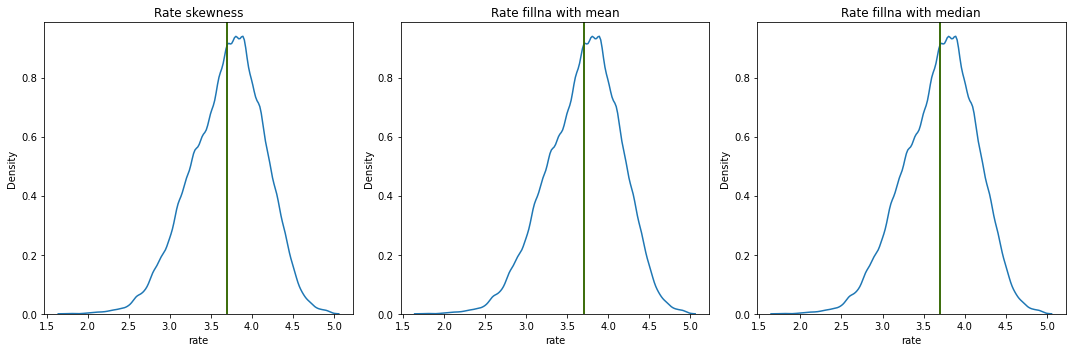

In [20]:
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)

sns.kdeplot(x=data.rate)
plt.axvline(data["rate"].mean(),color="r")
plt.axvline(data["rate"].median(),color="g")
plt.title('Rate skewness')

plt.subplot(1,3,2)

x=data["rate"].fillna(data["rate"].mean())
sns.kdeplot(x=data.rate)
plt.axvline(data["rate"].mean(),color="r")
plt.axvline(data["rate"].median(),color="g")
plt.title('Rate fillna with mean')

plt.subplot(1,3,3)

x=data["rate"].fillna(data["rate"].median())
sns.kdeplot(x=data.rate)
plt.axvline(data["rate"].mean(),color="r")
plt.axvline(data["rate"].median(),color="g")
plt.title('Rate fillna with median')
                 
plt.tight_layout()
plt.show()

### Getting the average rating for every restaurant

In [21]:
data_rate=data.groupby('name')['rate'].mean().to_frame()
data_rate=data_rate.reset_index()
data_rate.columns=['restaurant','rating']
data_rate.sort_values(by="rating",ascending=False).head(20)

,restaurant,rating
597,Asia Kitchen By Mainland China,4.900000
1274,Byg Brewski Brewing Company,4.900000
6552,SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...,4.900000
5927,Punjab Grill,4.871429
865,Belgian Waffle Factory,4.844828
2598,Flechazo,4.800000
5471,O.G. Variar & Sons,4.800000
8035,The Pizza Bakery,4.800000
129,AB's - Absolute Barbecues,4.789474
964,Biergarten,4.766667


In [22]:
data_rate.isnull().sum()*100/len(data_rate) # 24% of the restraunts don't have a rating

restaurant     0.000000
rating        24.374431
dtype: float64

In [23]:
data.groupby('name')['rate'].mean().to_frame().isnull().sum()

rate    2143
dtype: int64

* On finding average rating per restraunt, there are still NA values 
* There are 2143 restaurants that don't have a rating at all. They can be either new restraunts, or restruants with no ratings at all
* We can either set these ratings to 0 or set a special category

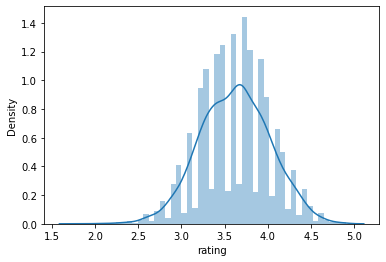

In [24]:
sns.distplot(data_rate['rating'])
plt.show()

* All the ratigs are between 3 and 4. It is very rare to have rating above 4.5

In [25]:
missing=data.isnull().sum()*100/data.shape[0]
missing

name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           19.410296
votes                           0.000000
rest_type                       0.439471
dish_liked                     54.258223
cuisines                        0.087120
approx_cost(for two people)     0.667919
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

* 19% of rate data is NAN

### (iii) Dealing with review list column

In [26]:
data.reviews_list = data.reviews_list.apply(lambda x: ast.literal_eval(x))
type(data.reviews_list[0])

list

In [27]:
data.reviews_list[0][0]

('Rated 4.0',
 'RATED\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.')

### Observation:
* We can see that in "Review_List" starting line come up with rating. 'Rated 4.0'.
* We can use this values and filled up 'Rate' colomn.

In [28]:
extracted = [float(i[0].replace('Rated','').strip()) for i in data.reviews_list[0]]
extracted

[4.0, 4.0, 2.0, 4.0, 5.0, 5.0, 4.0, 4.0, 5.0, 4.0, 4.0, 4.0]

Above are review for particular restaurant, we can use mean value.

In [29]:
extracted_mean = round((sum(extracted)/len(extracted)),1)
extracted_mean

4.1

In [30]:
print("Extracted Rate: ",extracted_mean)
print("Original Rate: ",data.rate[0])

Extracted Rate:  4.1
Original Rate:  4.1


In [31]:
def extract_features_from_review_list(x):
    '''
    extract the rate value out of a string inside tuple
    '''
    # ensure that x is not Null and there is more than one rate
    if not x or len(x) <= 1:
        return None
    
    # checked give values is text or not, if it is text then removed 'Rated', convert string to float.
    rate = [float(i[0].replace('Rated','').strip())  for i in x if type(i[0])== str]
    
    # return average value
    return round((sum(rate)/len(rate)),1)

In [32]:
# create new column
data['review_rate']  = data.reviews_list.apply(lambda x : extract_features_from_review_list(x))

In [33]:
## Compare "Original Rate" vs "Rate extracted from Review List"
data.loc[:,['rate','review_rate']].sample(10,random_state=1)

,rate,review_rate
40002,4.1,3.3
1407,3.8,NaN
49897,2.9,3.0
121,3.3,NaN
43418,3.1,3.1
37478,NaN,NaN
9001,NaN,NaN
29899,3.8,4.5
40824,NaN,NaN
17410,3.9,4.2


In [34]:
# get the before number of null values
data.rate.isna().sum()

10026

In [35]:
## finding rate = NaN and review_rate == not NaN
temp=data[["rate","review_rate"]].query('rate != rate & review_rate == review_rate')

In [36]:
temp.isnull().sum()

rate           1505
review_rate       0
dtype: int64

In [37]:
## finding index where rate==NaN and review_rate== not NaN
nan_index = data.query('rate != rate & review_rate == review_rate').index
for i in nan_index:
    data.loc[i,'rate'] = data.loc[i,'review_rate'] 

In [38]:
# update the number of null values now
data.rate.isna().sum()

8521

In [39]:
# check now
((data.isna().sum()/len(data))*100).round(2)

name                            0.00
online_order                    0.00
book_table                      0.00
rate                           16.50
votes                           0.00
rest_type                       0.44
dish_liked                     54.26
cuisines                        0.09
approx_cost(for two people)     0.67
reviews_list                    0.00
menu_item                       0.00
listed_in(type)                 0.00
listed_in(city)                 0.00
review_rate                    31.15
dtype: float64

* We managed to bring missing values from 19% to 16% in rate column

In [40]:
# # first let's drop the review_rate column now
data.drop(columns='review_rate',axis=1,inplace=True)

### (iii) Dealing with approx_cost(for two people)

In [41]:
data['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [42]:
data["approx_cost(for two people)"].replace({"nan":np.nan},inplace=True)

In [43]:
data["approx_cost(for two people)"]=data["approx_cost(for two people)"].apply(lambda x:str(x).replace(',',"")).astype("float")

### Getting the average approx cost for every restaurant

In [44]:
data_approx_cost=data.groupby('name')['approx_cost(for two people)'].mean().to_frame()
data_approx_cost=data_approx_cost.reset_index()
data_approx_cost.columns=['restaurant','approx_cost']
data_approx_cost.sort_values(by="approx_cost",ascending=False).head(20)

,restaurant,approx_cost
4372,Le Cirque Signature - The Leela Palace,6000.0
6263,Royal Afghan - ITC Windsor,5000.0
4628,Malties - Radisson Blu,4500.0
4276,La Brasserie - Le Meridien,4100.0
2965,Grill 99 - The Ritz-Carlton,4000.0
6207,Riwaz - The Ritz-Carlton,4000.0
4709,Masala Klub - The Taj West End,4000.0
2358,Dum Pukht Jolly Nabobs - ITC Windsor,4000.0
306,Alba - JW Marriott Bengaluru,4000.0
3693,Jamavar - The Leela Palace,4000.0


In [45]:
data_approx_cost.isnull().sum()*100/len(data_approx_cost) # 0.4% of the restaurants don't have an approx cost for two

restaurant     0.000000
approx_cost    0.409463
dtype: float64

In [46]:
data.groupby('name')['approx_cost(for two people)'].mean().to_frame().isnull().sum()

approx_cost(for two people)    36
dtype: int64

In [47]:
# There are 36 restaurants that don't have a approx cost for two at all. They can be either new restaurant, or don't have a set cost
# We can either set these approx cost based on the region or based on cuisine, or drop the rows all together

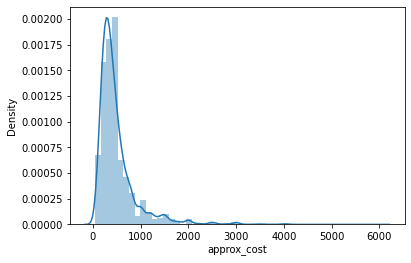

In [48]:
sns.distplot(data_approx_cost['approx_cost']) 
plt.show()

* Approx cost if between 0-1000, very few restaurants have cost above 1000. And very rarely above 2000

**Now we will remove missing values, from 'rate' and 'average_cost' colomn**

In [49]:
# drop null values
data.dropna(subset=['rate', 'approx_cost(for two people)'],inplace=True)

In [50]:
# check shape
data.shape

(42854, 13)

In [51]:
data.isna().sum()

name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
rest_type                        147
dish_liked                     19394
cuisines                           8
approx_cost(for two people)        0
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [52]:
# remove cuisines missing values
data=data[data.cuisines.isna()==False]

In [53]:
data.rename(columns={'approx_cost(for two people)': 'average_cost'}, inplace=True)

In [54]:
# check for percentage of null values 
((data.isna().sum()/data.shape[0])*100).round(2)

name                0.00
online_order        0.00
book_table          0.00
rate                0.00
votes               0.00
rest_type           0.34
dish_liked         45.25
cuisines            0.00
average_cost        0.00
reviews_list        0.00
menu_item           0.00
listed_in(type)     0.00
listed_in(city)     0.00
dtype: float64

In [55]:
data.dish_liked = data.dish_liked.apply(lambda x:x.lower().strip() if isinstance(x,str) else x)
data.dish_liked[:2]

0    pasta, lunch buffet, masala papad, paneer laja...
1    momos, lunch buffet, chocolate nirvana, thai g...
Name: dish_liked, dtype: object

In [56]:
menu_list = []

# collect the dishes' names and make a menu list for all kind of dishes
for dish in data.dish_liked.tolist():
    if isinstance(dish,str) and len(dish)>0:
        for e in dish.split(','):
            menu_list.append(e)
len(menu_list)

127815

In [57]:
# Now collect the unique dish name 
menu_set = set(menu_list)

As we replace review_rate into missing rate values can we do the same here.

### (iv) Dish_liked, handling using menu_list column

In [58]:
def clear_text(t):
    return ' '.join([i[1] for i in t]).encode('utf8').decode('ascii',errors='replace')
    

In [59]:
data['process_text'] = data.reviews_list.apply(lambda x: clear_text(x))

In [60]:
data['process_text']

0        RATED\n  A beautiful place to dine in.The inte...
1        RATED\n  Had been here for dinner with family....
2        RATED\n  Ambience is not that good enough and ...
3        RATED\n  Great food and proper Karnataka style...
4        RATED\n  Very good restaurant in neighbourhood...
                               ...                        
51709    RATED\n  Ambience- Big and spacious lawn was u...
51711    RATED\n  A fine place to chill after office ho...
51712    RATED\n  Food and service are incomparably exc...
51715    RATED\n  Nice and friendly place and staff is ...
51716    RATED\n  Great ambience , looking nice good se...
Name: process_text, Length: 42846, dtype: object

We can see that we need to cleanup text because it content different characters "�����,:-\n\n1, 3.5/5" . This kind of characters are present in text, we need to clean up those characters.

In [61]:
data['process_text'] = data.process_text.apply(lambda x : x.replace("RATED\n  ",'').replace('?','').replace('�','').replace('\n','').replace('.',' ').strip().lower())
# check part of reviews text for the first restaurant
data.process_text[0]

'a beautiful place to dine in the interiors take you back to the mughal era  the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available  but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again  i was here for dinner with my family on a weekday  the restaurant was completely empty  ambience is good with some good old hindi music  seating arrangement are good too  we ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha  food was fresh and good, service is good too  good for family hangout cheers its a restaurant near to banashankari bda  me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet  on inquiring they said this place is mostly visited by vegetarians  anyways we ordered ala carte items which took ages to come  

In [62]:
data.dish_liked.nunique()

5250

In [63]:
# make lower case
data.dish_liked = data.dish_liked.apply(lambda x:x.lower().strip() if isinstance(x,str) else x)

In [64]:
data.dish_liked[10000]

nan

In [65]:
menu_set.intersection(data.process_text[10000].split(' '))

{'chicken', 'fish', 'rice', 'thali'}

We are using 'menu_set' and 'process_text' data. Put it into liked dishes list. We are finding those keywords that are present in the menu_set and mentioned in the review_list, and filling the missing values in dish_liked column.

In [66]:
#creat a new column for the reviewed dish
data['dish_n_review'] = data.process_text.apply(lambda x: ', '.join(list(menu_set.intersection(x.split(' ')))))

In [67]:
# get sample to compare
data.query('dish_liked != dish_liked')[['dish_liked','dish_n_review']].sample(5,random_state=1)

,dish_liked,dish_n_review
51106,NaN,"fish, biryani, manchurian, halwa, chicken"
14224,NaN,pizza
28985,NaN,
39225,NaN,"biryani, naan, vegetarian"
7103,NaN,


In [68]:
# fill in the missing values in dish_liked column with data from reviews
nan_index = data.query('dish_liked != dish_liked & dish_n_review == dish_n_review').index
for i in nan_index:
    data.loc[i,'dish_liked'] = data.loc[i,'dish_n_review']

In [69]:
data.dish_liked[10000]

'chicken, fish, thali, rice'

* Now we can drop the menu_list & menu_set

In [70]:
del menu_list
del menu_set

In [71]:
# first let's drop the review_rate column now
data.drop(columns=['dish_n_review'],axis=1,inplace=True)

In [72]:
# check for null values
((data.isna().sum()/data.shape[0])*100).round(3)

name               0.000
online_order       0.000
book_table         0.000
rate               0.000
votes              0.000
rest_type          0.343
dish_liked         0.000
cuisines           0.000
average_cost       0.000
reviews_list       0.000
menu_item          0.000
listed_in(type)    0.000
listed_in(city)    0.000
process_text       0.000
dtype: float64

In [73]:
data.shape

(42846, 14)

In [74]:
pd.crosstab(data["listed_in(type)"],data["rest_type"])

rest_type,Bakery,"Bakery, Beverage Shop","Bakery, Cafe","Bakery, Dessert Parlor","Bakery, Food Court","Bakery, Kiosk","Bakery, Quick Bites",Bar,"Bar, Casual Dining","Bar, Lounge",...,"Quick Bites, Dessert Parlor","Quick Bites, Food Court","Quick Bites, Kiosk","Quick Bites, Meat Shop","Quick Bites, Mess","Quick Bites, Sweet Shop",Sweet Shop,"Sweet Shop, Quick Bites",Takeaway,"Takeaway, Delivery"
listed_in(type),,,,,,,,,,,,,,,,,,,,,
Buffet,0,0,0,0,0,0,0,10,7,0,...,0,0,0,0,0,0,0,0,0,0
Cafes,0,0,20,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Delivery,379,0,21,64,0,4,73,74,63,0,...,35,8,0,2,2,25,177,63,70,1262
Desserts,379,1,19,59,2,3,94,0,0,0,...,20,0,0,0,0,27,164,74,16,75
Dine-out,11,0,12,4,0,0,57,223,138,2,...,20,9,1,2,2,23,27,33,0,19
Drinks & nightlife,0,0,0,0,0,0,0,204,103,2,...,0,0,0,0,0,0,0,0,0,0
Pubs and bars,3,0,0,0,0,0,0,129,91,2,...,0,0,0,0,0,0,0,1,0,0


In [75]:
data.groupby(["listed_in(type)","rest_type"]).size()

listed_in(type)  rest_type              
Buffet           Bar                        10
                 Bar, Casual Dining          7
                 Cafe                        3
                 Cafe, Casual Dining         3
                 Cafe, Lounge                5
                                            ..
Pubs and bars    Pub, Bar                    6
                 Pub, Cafe                   5
                 Pub, Casual Dining         41
                 Pub, Microbrewery          15
                 Sweet Shop, Quick Bites     1
Length: 299, dtype: int64

* There is a relation between listed_in(type) and rest_type. But due to lost of variations we won't be using the column to replace missing values

In [76]:
# drop null values
data.dropna(subset=['rest_type'],inplace=True)

In [77]:
# check for null values
((data.isna().sum()/data.shape[0])*100).round(3)

name               0.0
online_order       0.0
book_table         0.0
rate               0.0
votes              0.0
rest_type          0.0
dish_liked         0.0
cuisines           0.0
average_cost       0.0
reviews_list       0.0
menu_item          0.0
listed_in(type)    0.0
listed_in(city)    0.0
process_text       0.0
dtype: float64

* No missing values remaining in the dataset

In [78]:
data.head(3)

,name,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,listed_in(type),listed_in(city),process_text
0,Jalsa,Yes,Yes,4.1,775,Casual Dining,"pasta, lunch buffet, masala papad, paneer laja...","North Indian, Mughlai, Chinese",800.0,"[(Rated 4.0, RATED\n A beautiful place to din...",[],Buffet,Banashankari,a beautiful place to dine in the interiors tak...
1,Spice Elephant,Yes,No,4.1,787,Casual Dining,"momos, lunch buffet, chocolate nirvana, thai g...","Chinese, North Indian, Thai",800.0,"[(Rated 4.0, RATED\n Had been here for dinner...",[],Buffet,Banashankari,had been here for dinner with family turned o...
2,San Churro Cafe,Yes,No,3.8,918,"Cafe, Casual Dining","churros, cannelloni, minestrone soup, hot choc...","Cafe, Mexican, Italian",800.0,"[(Rated 3.0, RATED\n Ambience is not that goo...",[],Buffet,Banashankari,ambience is not that good enough and it's not ...


# Part 2: EDA

### 2.1 Univariate analysis

In [79]:
data.select_dtypes(include=np.number).columns

Index(['rate', 'votes', 'average_cost'], dtype='object')

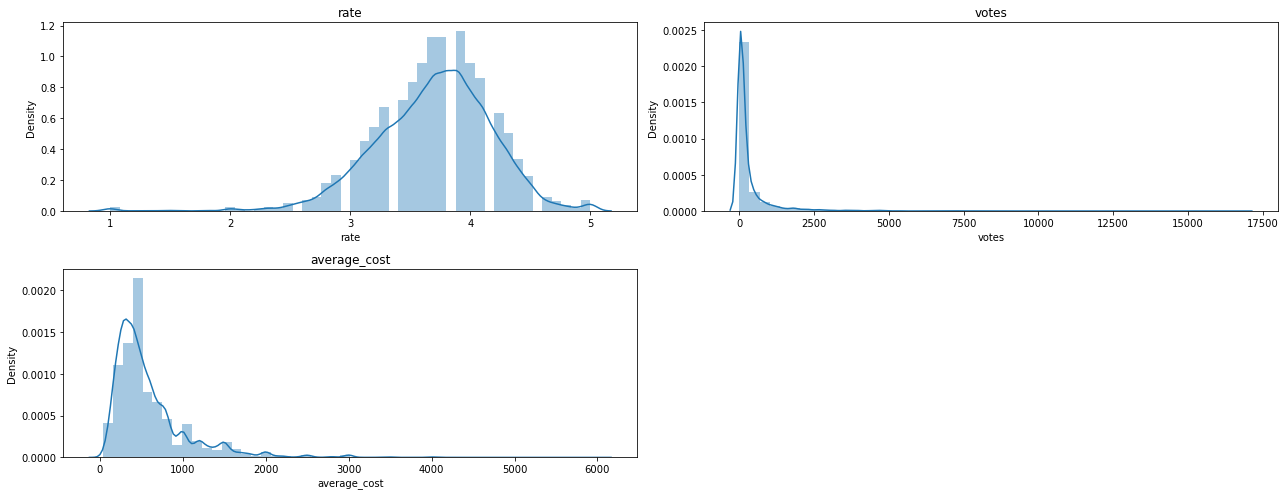

In [80]:
num_vars=data.select_dtypes(include=np.number).columns

nrows=2
ncols=2
repeater=1

plt.figure(figsize=(18,7))

for i in num_vars:
    plt.subplot(nrows,ncols,repeater)
    repeater+=1
    plt.title(i)
    sns.distplot(data[i])
                 
plt.tight_layout()
plt.show()

In [81]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
rate,42699.0,3.698433,0.486366,1.0,3.4,3.7,4.0,5.0
votes,42699.0,341.142064,871.724350,0.0,18.0,68.0,261.0,16832.0
average_cost,42699.0,597.838497,460.976344,40.0,300.0,450.0,700.0,6000.0


In [82]:
data.select_dtypes(include="object").columns

Index(['name', 'online_order', 'book_table', 'rest_type', 'dish_liked',
       'cuisines', 'reviews_list', 'menu_item', 'listed_in(type)',
       'listed_in(city)', 'process_text'],
      dtype='object')

In [83]:
data.describe(include="object").T

,count,unique,top,freq
name,42699,6838,Cafe Coffee Day,86
online_order,42699,2,Yes,27920
book_table,42699,2,No,36305
rest_type,42699,88,Quick Bites,14529
dish_liked,42699,7438,,4443
cuisines,42699,2416,North Indian,2203
reviews_list,42699,21649,[],1110
menu_item,42699,8492,[],31430
listed_in(type),42699,7,Delivery,21235
listed_in(city),42699,30,BTM,2690


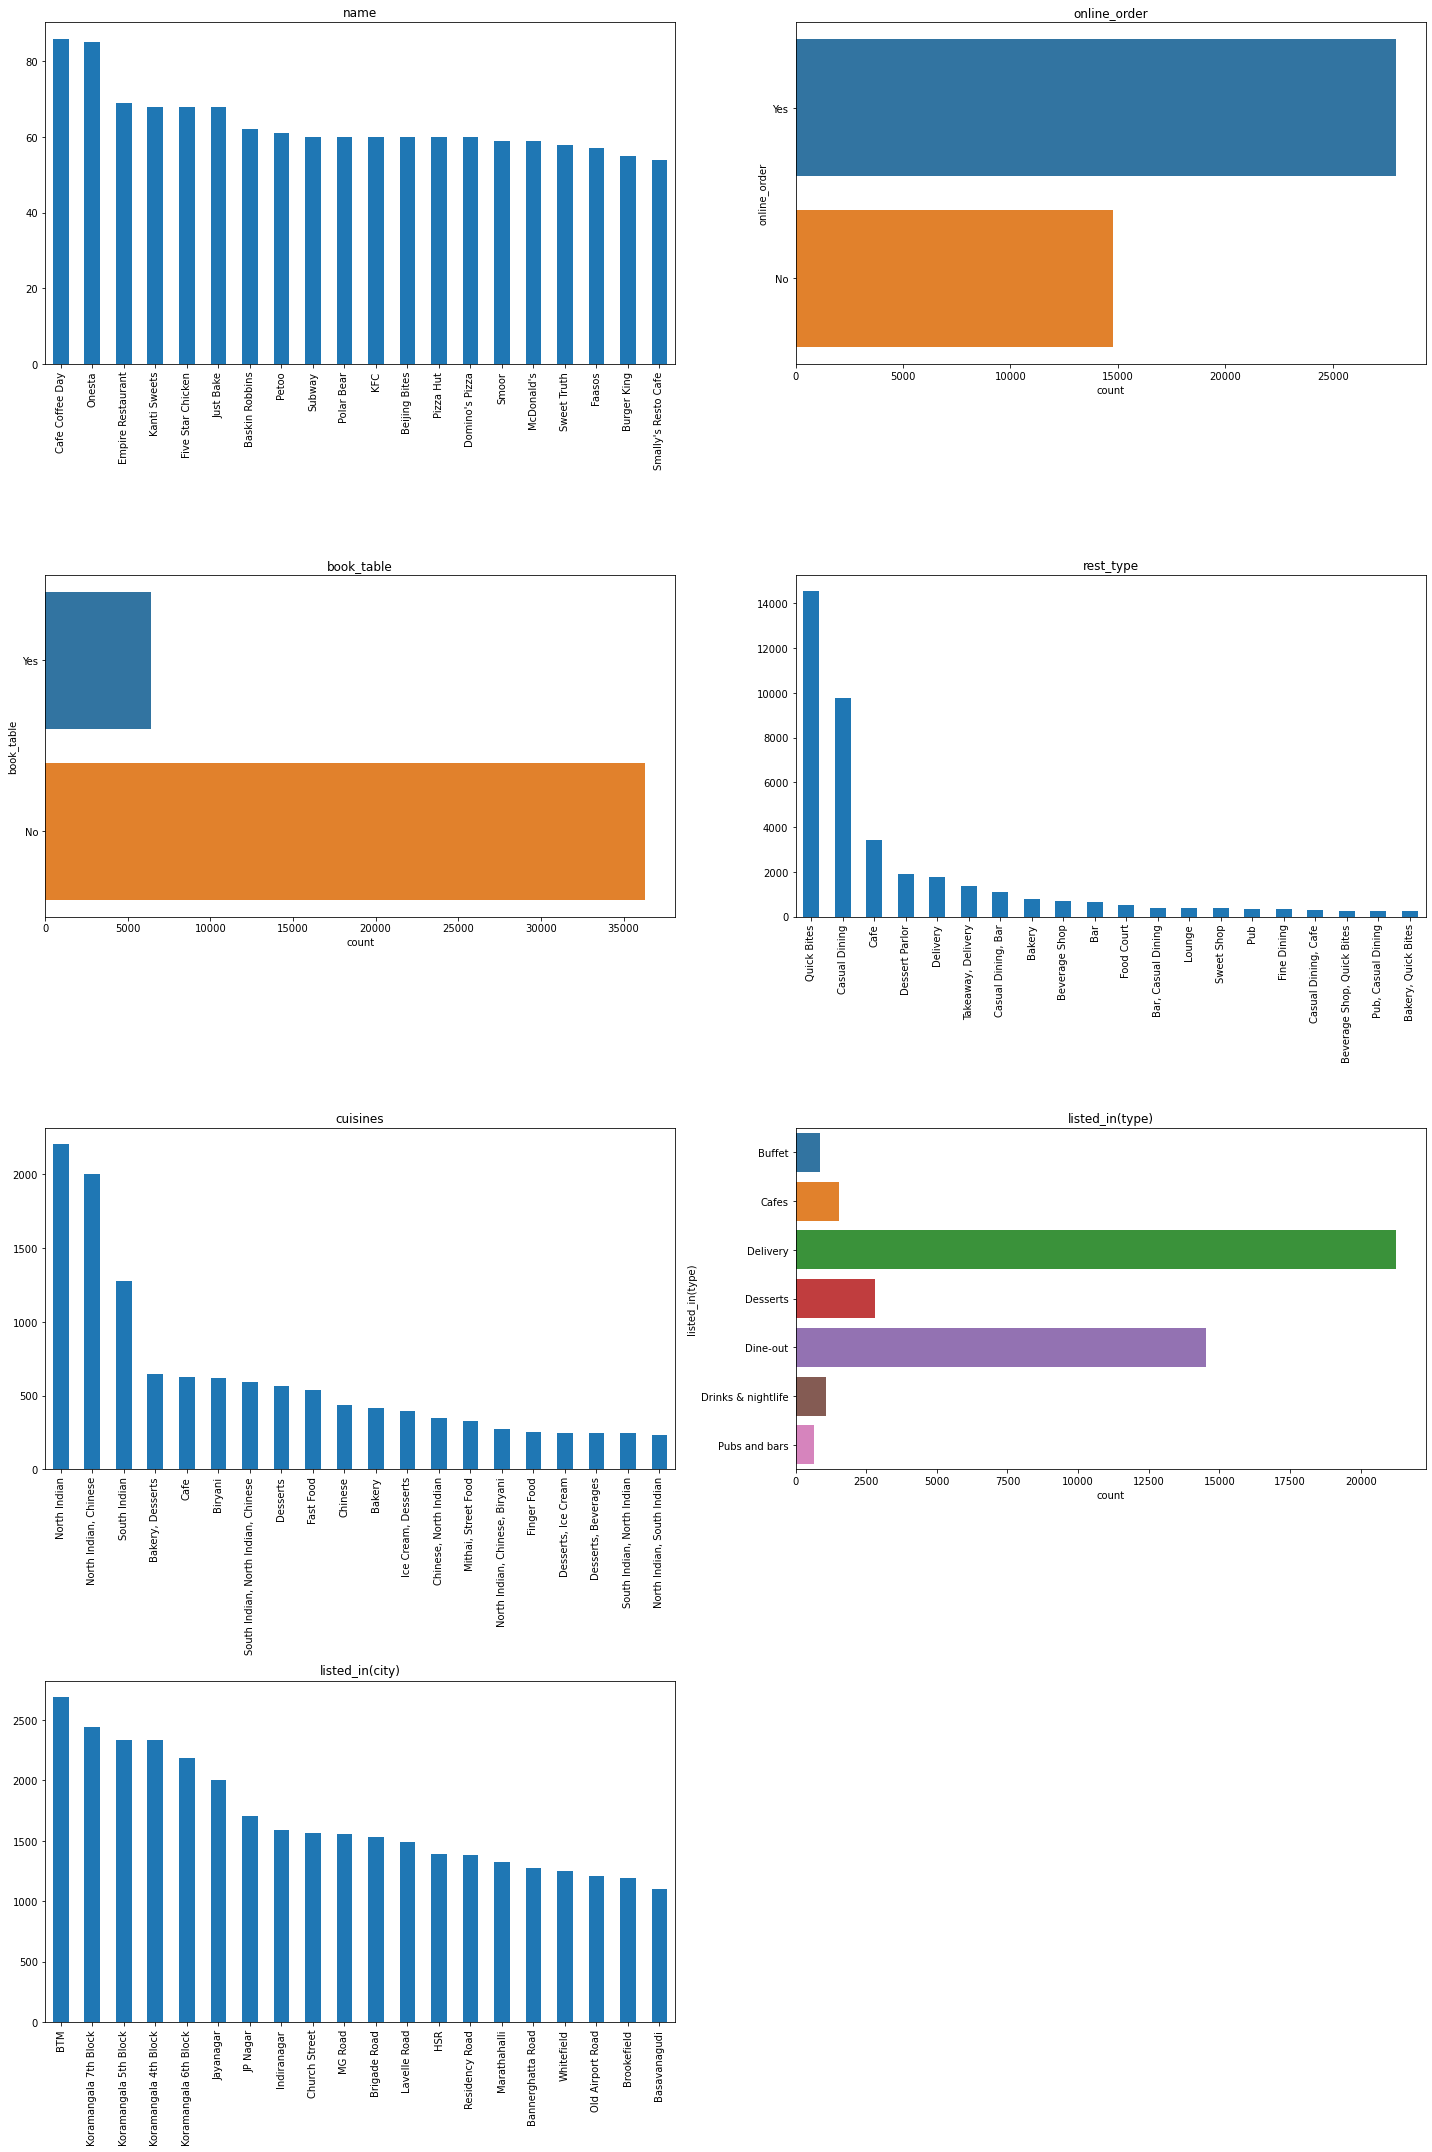

In [84]:
cat_var=['name', 'online_order', 'book_table', 'rest_type', 'cuisines',
       'listed_in(type)', 'listed_in(city)']

nrows=4
ncols=2
repeater=1

plt.figure(figsize=(20,30))

for i in cat_var:
    plt.subplot(nrows,ncols,repeater)
    repeater+=1
    plt.title(i)
    if data[i].nunique() in range(0,10):
        sns.countplot(y=i,data=data)
    else:
        data[i].value_counts().head(20).plot(kind="bar")
        #plt.xticks(rotation=90)
    
plt.tight_layout()
plt.show()

* The restuarant with the highest number of outlets in Bangalore is CafeCoffeeDay
* There are more number of restaurants that take online orders as compared to those that take only offline orders
* There are less number of restuarants that allow to book table, and more that don't allow.
* The restuarant type with the highest number of outlets in Bangalore is "Quick Bites"
* The restuarant cusine with the highest number of outlets in Bangalore is "North Indian"
* The location with the highest number of outlets in Bangalore is "BTM"

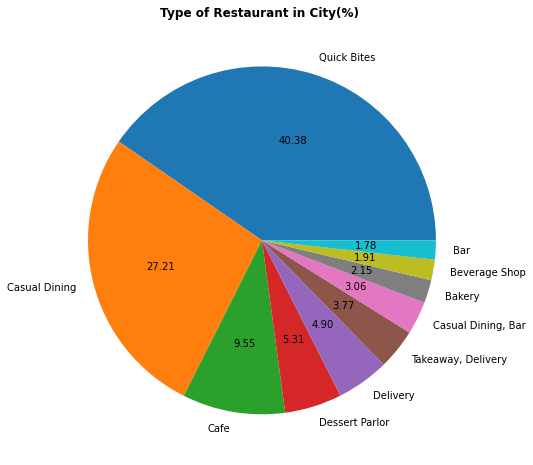

In [85]:
plt.figure(figsize=(8,8))
values = data.rest_type.value_counts()[:10]
labels = data['rest_type'].value_counts()[:10].index
plt.pie(values, labels=labels, autopct='%.2f')
plt.title('Type of Restaurant in City(%) ', weight='bold')
plt.show()

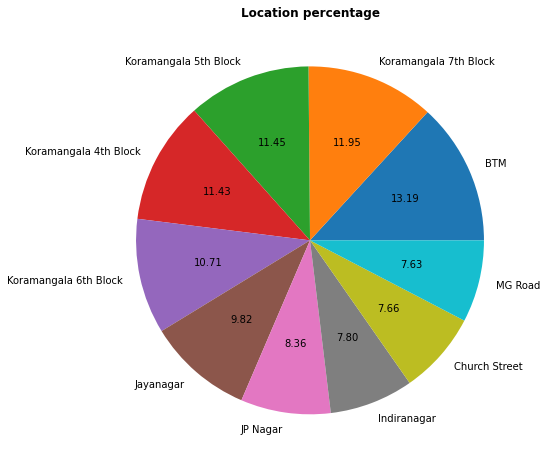

In [86]:
plt.figure(figsize=(8,8))
values = data['listed_in(city)'].value_counts()[:10]
labels = data['listed_in(city)'].value_counts()[:10].index
plt.pie(values, labels=labels, autopct='%.2f')
plt.title('Location percentage', weight='bold')
plt.show()

In [87]:
# count each dish to see how many times each dish repeated
dish_count = []
for i in data.dish_liked: ## iterate in each rows in table
    for t in i.split(','):
        t = t.strip() # remove the white spaces to get accurate results
        dish_count.append(t)

In [88]:
dish_count[:10]

['pasta',
 'lunch buffet',
 'masala papad',
 'paneer lajawab',
 'tomato shorba',
 'dum biryani',
 'sweet corn soup',
 'momos',
 'lunch buffet',
 'chocolate nirvana']

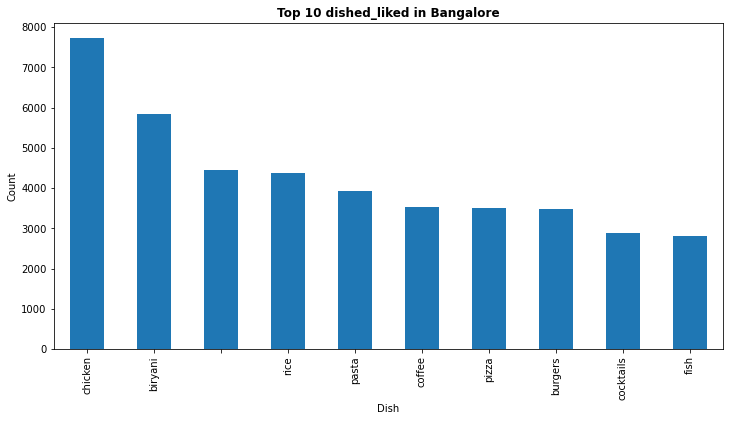

In [89]:
plt.figure(figsize=(12,6)) 
pd.Series(dish_count).value_counts()[:10].plot(kind='bar')
plt.title('Top 10 dished_liked in Bangalore',weight='bold')
plt.xlabel('Dish')
plt.ylabel('Count')
plt.show()

* We can see that 'chicken' is most favourite dish followed by 'biryani'

### 2.2 Bivariate analysis

**'Rate' vs 'Restaurant type' graph.**

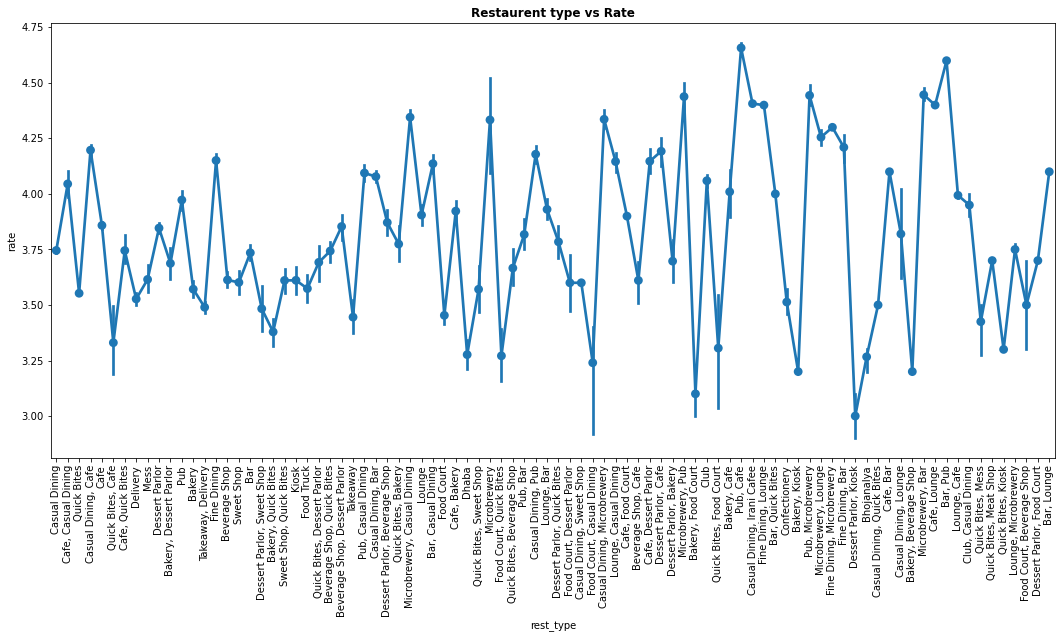

In [90]:
f,ax=plt.subplots(figsize=(18,8))
g = sns.pointplot(x=data["rest_type"], y=data["rate"], data=data)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Restaurent type vs Rate', weight = 'bold')
plt.show()

* Pub, Cafe have overall highest rating followed by Bar, Pub

**'Rate' vs 'Online order'**

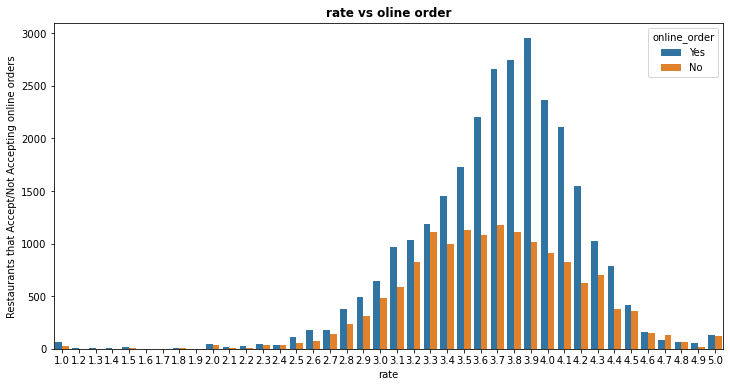

In [91]:
plt.figure(figsize = (12,6))
sns.countplot(x=data['rate'], hue = data['online_order'])
plt.ylabel("Restaurants that Accept/Not Accepting online orders")
plt.title("rate vs oline order",weight = 'bold')
plt.show()

* There is not much difference for restuarant rate based on Online Order provided or not provided

**'Avearge cost' vs 'Restaurant type' graph**

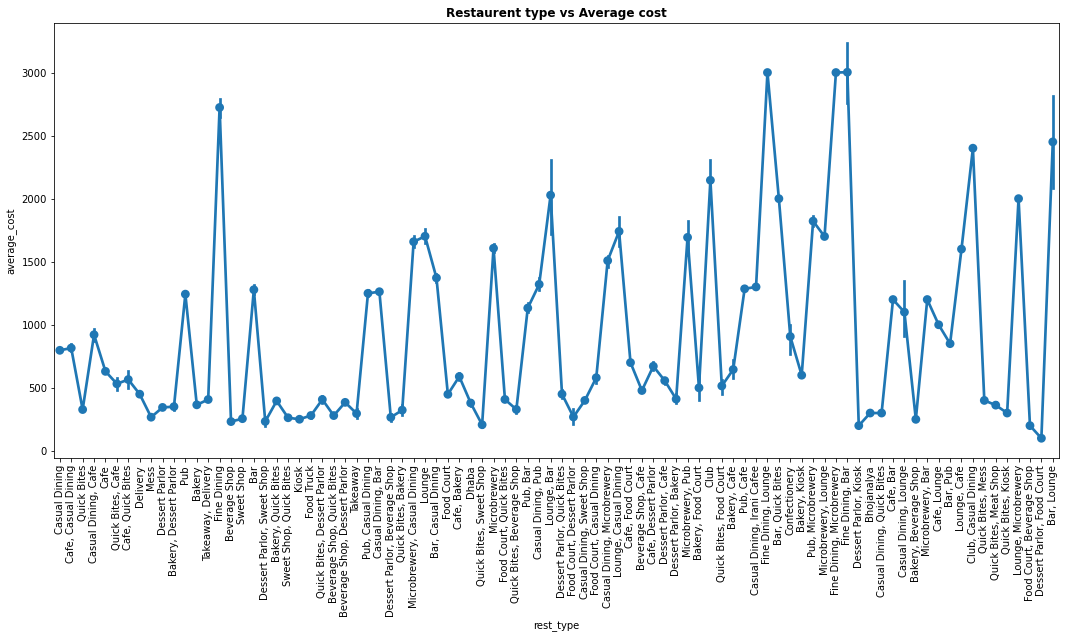

In [92]:
f,ax=plt.subplots(figsize=(18,8))
g = sns.pointplot(x=data["rest_type"], y=data["average_cost"], data=data)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Restaurent type vs Average cost', weight = 'bold')
plt.show()

* Fine dining, Bar, Quick Bites, and Casual Dining have approximately the highest average cost for two people
* Dessert parlor, Food court has the lowest average cost for two people

**'Average cost' vs 'Online order'**

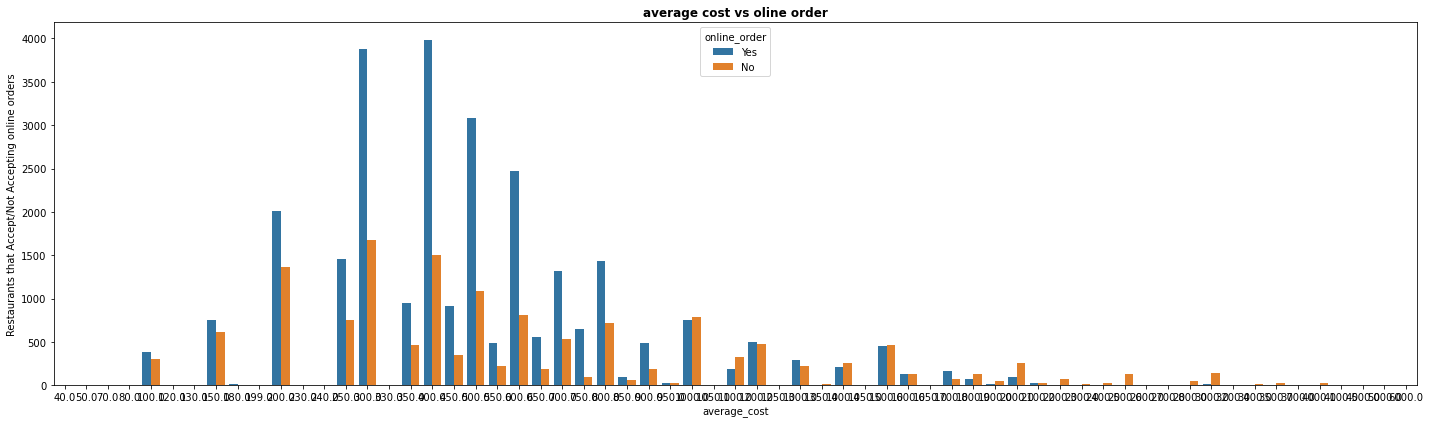

In [93]:
plt.figure(figsize = (20,6))
sns.countplot(x=data['average_cost'], hue = data['online_order'])
plt.ylabel("Restaurants that Accept/Not Accepting online orders")
plt.title("average cost vs oline order",weight = 'bold')
plt.tight_layout()
plt.show()

* There is a variation in the distribution of restuarant average cost based on Online Order provided or not provided

In [94]:
data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'rest_type',
       'dish_liked', 'cuisines', 'average_cost', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'process_text'],
      dtype='object')

### 2.3 Outlier Detection

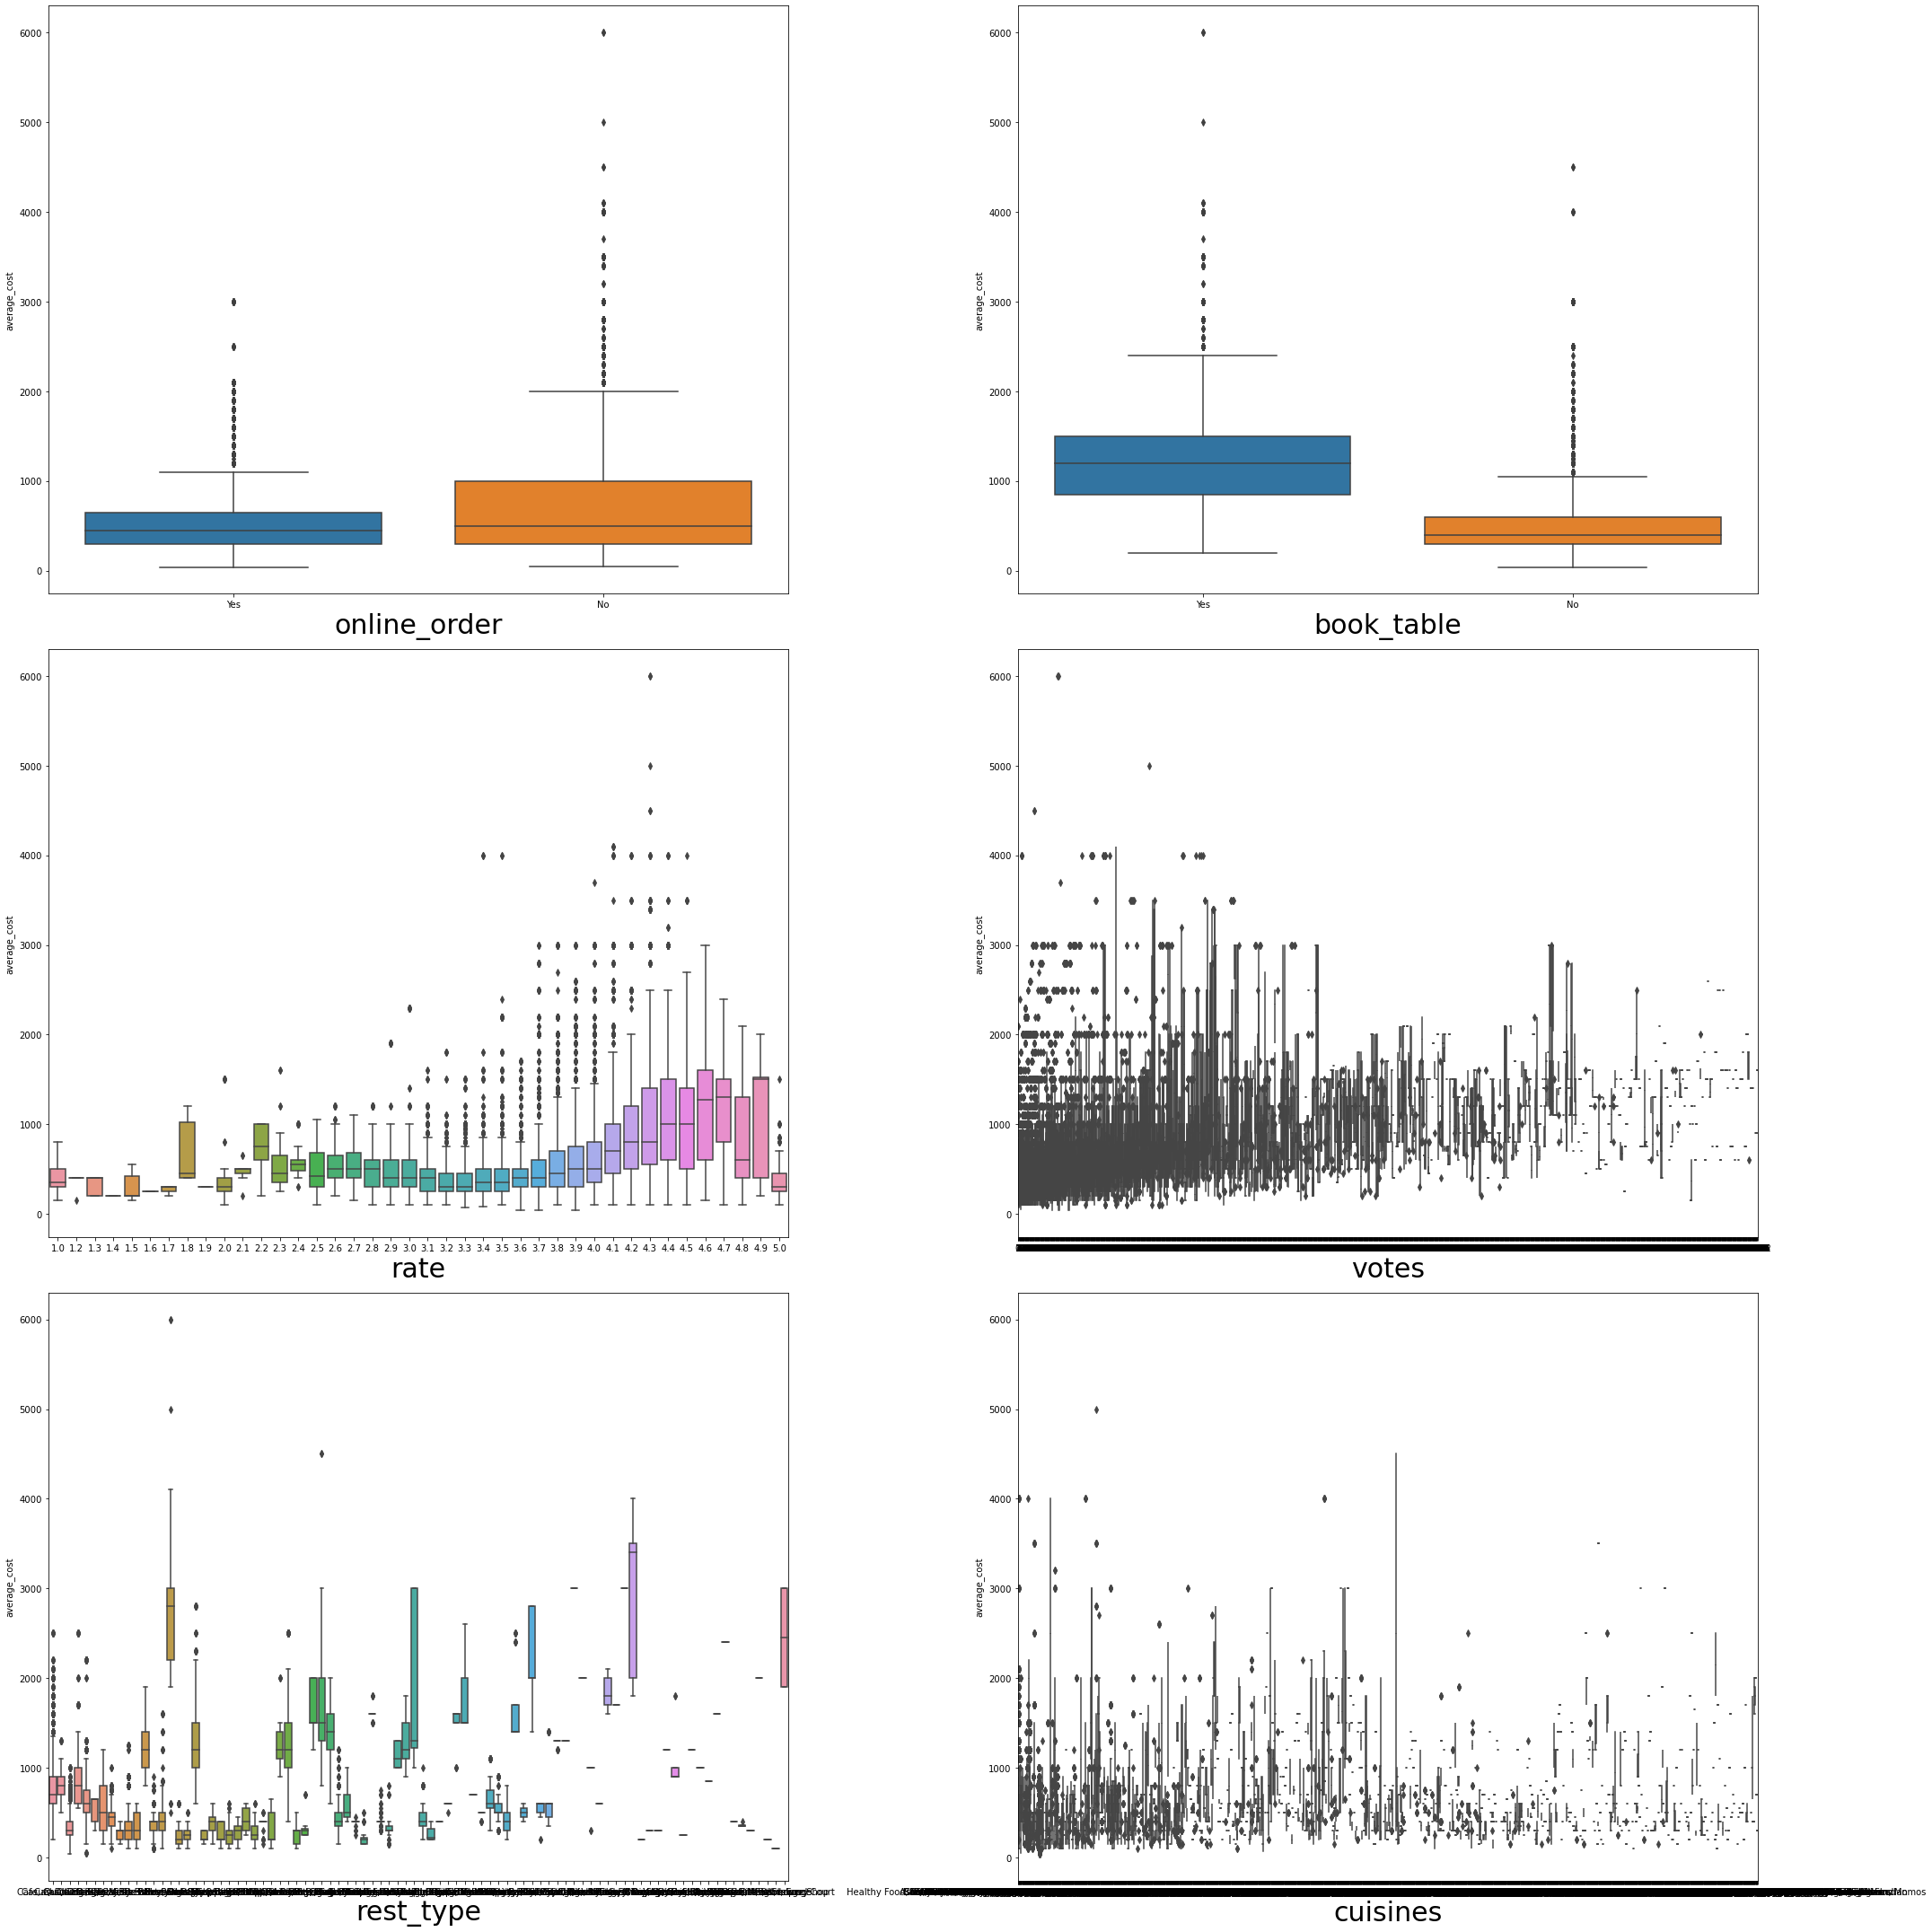

In [95]:
fig, ax = plt.subplots(3, 2, figsize=(30, 30))

# plot a boxplot for all the categorical variables 
for variable, subplot in zip(['online_order','book_table','rate','votes','rest_type','cuisines'], ax.flatten()):
    
    boxplt = sns.boxplot(x=variable, y='average_cost', data=data, ax=subplot)
    boxplt.set_xlabel(variable, fontsize = 30)

# avoid overlapping of the plots using tight_layout()    
plt.tight_layout()   

# display the plot
plt.show() 

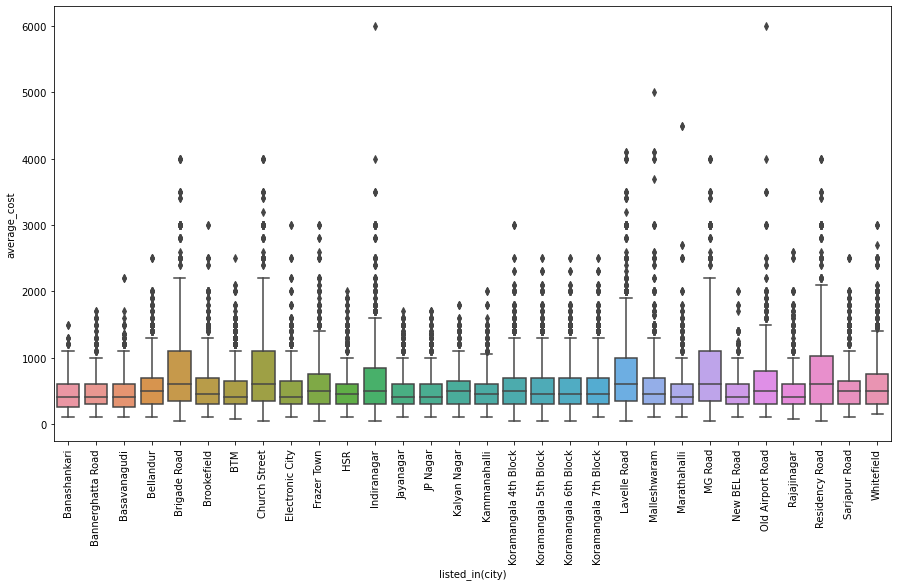

In [96]:
# set the figure size
plt.figure(figsize=(15, 8))

ax = sns.boxplot(x=data['listed_in(city)'], y=data['average_cost'], data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize = 10)

# display the plot
plt.show()

### 2.3 Feature engineering

In [97]:
data["listed_in(city)"].nunique()

30

In [98]:
data["listed_in(city)"].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [99]:
data['region']=data['listed_in(city)']
data.region.unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [100]:
data['region'].replace(['Banashankari','Basavanagudi','Bannerghatta Road',
                        'Jayanagar','JP Nagar','Residency Road'],
                        'Southern',inplace=True)

In [101]:
data['region'].replace(['Bellandur','Marathahalli','Whitefield','Brookefield','MG Road',
                        'Old Airport Road'],
                        'Eastern',inplace=True)

In [102]:
data['region'].replace(['BTM','Electronic City','HSR','Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block','Sarjapur Road'],
                                    'South-Eastern',inplace=True)

In [103]:
data['region'].replace(['Indiranagar','Brigade Road','Lavelle Road',
                       'Church Street'],
                        'Central',inplace=True)

In [104]:
data['region'].replace(['Kalyan Nagar','Kammanahalli','Frazer Town'],
                        'North-Eastern',inplace=True)

In [105]:
data['region'].replace(['Rajajinagar'],'Western',inplace=True)

In [106]:
data['region'].replace(['Malleshwaram'],'North-Western',inplace=True)

In [107]:
data['region'].replace(['New BEL Road'],'Northern',inplace=True)

In [108]:
data['region'].value_counts()

South-Eastern    15291
Southern          8208
Eastern           7529
Central           6167
North-Eastern     3081
North-Western      956
Western            887
Northern           580
Name: region, dtype: int64

In [109]:
data.drop(['listed_in(city)'], axis=1,inplace=True)

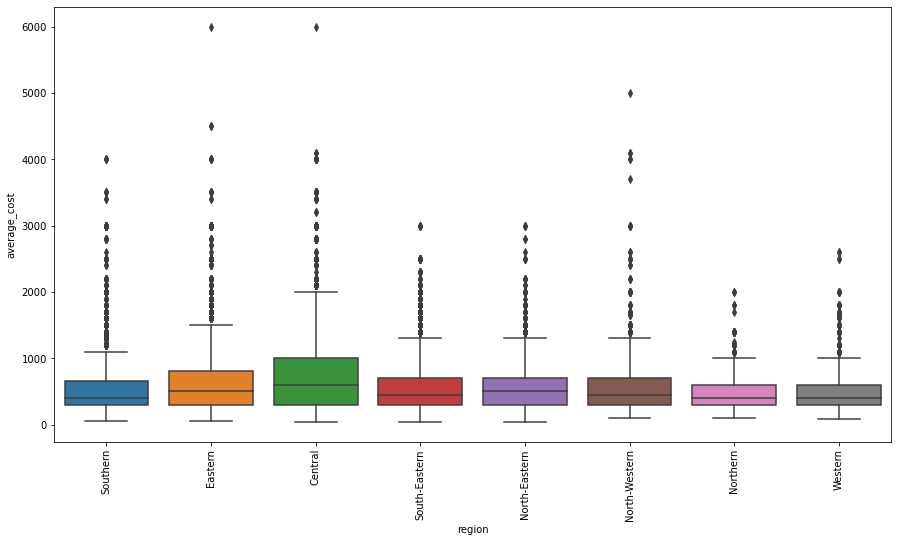

In [110]:
# set figure size
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="region", y="average_cost", data=data)
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90)

# show the plot
plt.show()

* we will not be handling outliers

In [111]:
df_numeric_features = data.select_dtypes(include=np.number)
df_numeric_features.columns

Index(['rate', 'votes', 'average_cost'], dtype='object')

In [112]:
df_categoric_features = data.select_dtypes(include='object')
df_categoric_features.columns

Index(['name', 'online_order', 'book_table', 'rest_type', 'dish_liked',
       'cuisines', 'reviews_list', 'menu_item', 'listed_in(type)',
       'process_text', 'region'],
      dtype='object')

**Need to categorize cuisine**

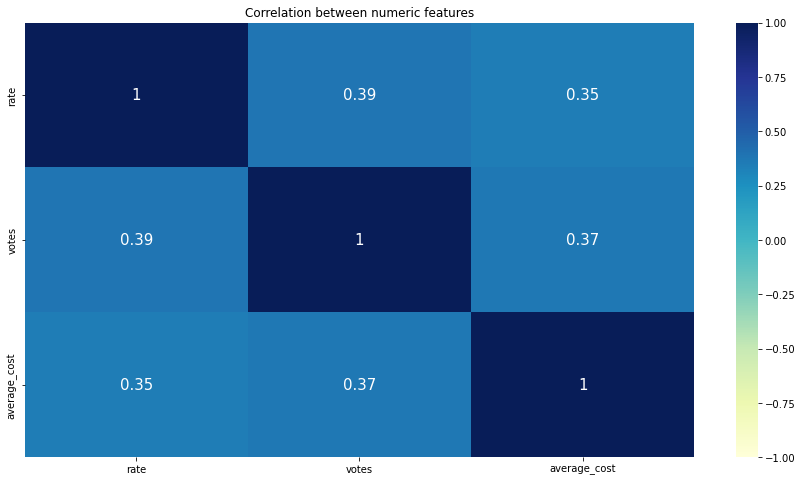

In [113]:
# set the figure size
plt.figure(figsize=(15, 8))

sns.heatmap(data.corr(), cmap='YlGnBu', vmax=1.0, vmin=-1.0, annot = True, annot_kws={"size": 15}, )

# specify name of the plot using plt.title()
plt.title('Correlation between numeric features')

# display the plot
plt.show()

### 2.4 Prepare the data

**Check for Normality**

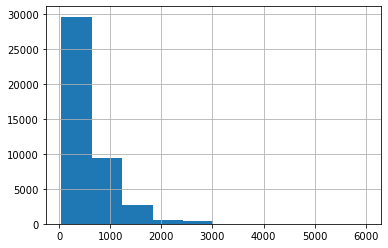

In [114]:
data.average_cost.hist()

# display the plot
plt.show()

* From the above plot, we can notice that the variable 'average cost' is heavily right skewed and not normally distributed

Let us perform the Jarque-Bera test to check the normality of the target variable.

The null and alternate hypothesis of Jarque-Bera test are as follows:

H0: The data is normally distributed
H1: The data is not normally distributed

In [115]:
# normality test using jarque_bera()
# the test returns the the test statistics and the p-value of the test
stat, p = jarque_bera(data["average_cost"])

print('Statistics=%.3f, p-value=%.3f' % (stat, p))

# display the conclusion
# set the level of significance to 0.05
alpha = 0.05

# if the p-value is greater than alpha print we accept alpha 
# if the p-value is less than alpha print we reject alpha
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=194558.363, p-value=0.000
The data is not normally distributed (reject H0)


**If the data is not normally distributed, use log transformation to get near normally distributed data**

In [116]:
data['log_average_cost'] = np.log(data['average_cost'])

# display first 5 rows of the data
data.head(2)

,name,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,listed_in(type),process_text,region,log_average_cost
0,Jalsa,Yes,Yes,4.1,775,Casual Dining,"pasta, lunch buffet, masala papad, paneer laja...","North Indian, Mughlai, Chinese",800.0,"[(Rated 4.0, RATED\n A beautiful place to din...",[],Buffet,a beautiful place to dine in the interiors tak...,Southern,6.684612
1,Spice Elephant,Yes,No,4.1,787,Casual Dining,"momos, lunch buffet, chocolate nirvana, thai g...","Chinese, North Indian, Thai",800.0,"[(Rated 4.0, RATED\n Had been here for dinner...",[],Buffet,had been here for dinner with family turned o...,Southern,6.684612


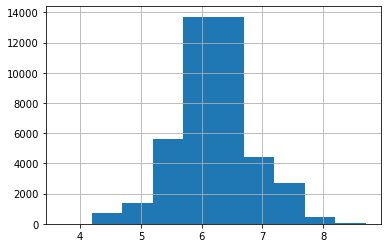

In [117]:
data.log_average_cost.hist()

# display the plot
plt.show()

In [118]:
# normality test using jarque_bera()
# the test returns the the test statistics and the p-value of the test
stat, p = jarque_bera(data["average_cost"])

print('Statistics=%.3f, p-value=%.3f' % (stat, p))

# display the conclusion
# set the level of significance to 0.05
alpha = 0.05

# if the p-value is greater than alpha print we accept alpha 
# if the p-value is less than alpha print we reject alpha
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=194558.363, p-value=0.000
The data is not normally distributed (reject H0)


In [119]:
data.rest_type.nunique()

88

### 2.5 Dummy Encoding of Categorical Variables

In [120]:
data.rest_type.nunique(),data['listed_in(type)'].nunique()

(88, 7)

In [121]:
# removed ',' between two words; then converted to categorical features
data['rest_type'] = data['rest_type'].str.replace(',' , '') 
data['rest_type'] = data['rest_type'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
data['rest_type'].value_counts().head()

Bites Quick       14529
Casual Dining      9788
Cafe               3435
Dessert Parlor     1910
Delivery           1762
Name: rest_type, dtype: int64

* Keeping rest type and droping listed_in(type)

In [122]:
# drop redudant columns
data.drop(columns=['dish_liked','reviews_list','menu_item','listed_in(type)','process_text'], inplace=True)

In [123]:
data['online_order']= pd.get_dummies(data.online_order, drop_first=True) 
data['book_table']= pd.get_dummies(data.book_table, drop_first=True) 
data.head(2)

,name,online_order,book_table,rate,votes,rest_type,cuisines,average_cost,region,log_average_cost
0,Jalsa,1,1,4.1,775,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Southern,6.684612
1,Spice Elephant,1,0,4.1,787,Casual Dining,"Chinese, North Indian, Thai",800.0,Southern,6.684612


In [124]:
# removed ',' between two words; then converted to categorical features

data['cuisines'] = data['cuisines'].str.replace(',' , '') 
data['cuisines'] = data['cuisines'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
data['cuisines'].value_counts().head()

Chinese Indian North                 2348
Indian North                         2203
Indian South                         1274
Chinese Indian Indian North South    1117
Bakery Desserts                       818
Name: cuisines, dtype: int64

In [125]:
df_numeric_features = data.select_dtypes(include=np.number)

# display the numeric features
df_numeric_features.columns

Index(['online_order', 'book_table', 'rate', 'votes', 'average_cost',
       'log_average_cost'],
      dtype='object')

In [126]:
df_categoric_features = data.select_dtypes(include=[np.object])

# display categorical features
df_categoric_features.columns

Index(['name', 'rest_type', 'cuisines', 'region'], dtype='object')

In [127]:
df_categoric_features.drop(['name'],axis = 1,inplace=True)

In [128]:
df_categoric_features.columns

Index(['rest_type', 'cuisines', 'region'], dtype='object')

In [129]:
data.cuisines.nunique()

1726

In [130]:
for col in df_categoric_features.columns.values:
    dummy_encoded_variables = pd.get_dummies(df_categoric_features[col], prefix=col, drop_first=True)
    df_categoric_features = pd.concat([df_categoric_features, dummy_encoded_variables],axis=1)
    df_categoric_features.drop([col], axis=1, inplace=True)

In [131]:
df_average_cost_dummy = pd.concat([df_numeric_features, df_categoric_features], axis=1)

# display data with dummy variables
df_average_cost_dummy.head()

,online_order,book_table,rate,votes,average_cost,log_average_cost,rest_type_Bakery Beverage Shop,rest_type_Bakery Bites Quick,rest_type_Bakery Cafe,rest_type_Bakery Court Food,...,cuisines_Tibetan,cuisines_Turkish,cuisines_Vietnamese,region_Eastern,region_North-Eastern,region_North-Western,region_Northern,region_South-Eastern,region_Southern,region_Western
0,1,1,4.1,775,800.0,6.684612,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,4.1,787,800.0,6.684612,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,3.8,918,800.0,6.684612,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,3.7,88,300.0,5.703782,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,3.8,166,600.0,6.396930,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# Part 3: ML

### Section A: Regression model

Considering only those columns that can be used for prediction of Approx cost

### 3.1 Splitting the data for Model Building

In [132]:
# add the intercept column to the dataset
df_average_cost_dummy = sm.add_constant(df_average_cost_dummy)

X = df_average_cost_dummy.drop(['average_cost','log_average_cost'], axis=1)

# extract the target variable from the data set
y = df_average_cost_dummy[['log_average_cost','average_cost']]

# split data into train subset and test subset for predictor and target variables
# random_state: the seed used by the random number generator
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print("The shape of X_train is:",X_train.shape)
print("The shape of X_test is:",X_test.shape)
print("The shape of y_train is:",y_train.shape)
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (32024, 1803)
The shape of X_test is: (10675, 1803)
The shape of y_train is: (32024, 2)
The shape of y_test is: (10675, 2)


In [133]:
X_train.head(2)

,const,online_order,book_table,rate,votes,rest_type_Bakery Beverage Shop,rest_type_Bakery Bites Quick,rest_type_Bakery Cafe,rest_type_Bakery Court Food,rest_type_Bakery Dessert Parlor,...,cuisines_Tibetan,cuisines_Turkish,cuisines_Vietnamese,region_Eastern,region_North-Eastern,region_North-Western,region_Northern,region_South-Eastern,region_Southern,region_Western
3234,1.0,1,0,4.2,228,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10463,1.0,0,0,4.0,147,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### 4.1 Model -1 Multiple Linear Regression - Full Model - with Log Transformed Dependent Variable (OLS)

In [134]:
linreg_full_model_withlog = sm.OLS(np.asarray(y_train["log_average_cost"]), X_train).fit()

# print the summary output
print(linreg_full_model_withlog.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     78.85
Date:                Sat, 25 Nov 2023   Prob (F-statistic):               0.00
Time:                        00:57:35   Log-Likelihood:                -4625.9
No. Observations:               32024   AIC:                         1.276e+04
Df Residuals:                   30269   BIC:                         2.746e+04
Df Model:                        1754                                         
Covariance Type:            nonrobust                                         
                                                                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

* This model explains 81.0% of the variation in dependent variable average cost.The Durbin-Watson test statistics is 2.031 and indicates that there is slight positive autocorrelation. The Condition Number 3.46e+21 suggests that there is severe collinearity.

Condition Number : One way to assess multicollinearity is to compute the condition number(CN). If CN is less than 100, there is no multicollinearity. If CN is between 100 and 1000, there is moderate multicollinearity and if CN is greater 1000 there is severe multicollinearity in the data

Durbin-Watson : The Durbin-Watson statistic will always have a value between 0 and 4. A value of 2.0 means that there is no autocorrelation detected in the sample. Values from 0 to less than 2 indicate positive autocorrelation and values from from 2 to 4 indicate negative autocorrelation

In [135]:
# predict the 'log_average_cost' using predict()
linreg_full_model_withlog_predictions = linreg_full_model_withlog.predict(X_test)

In [136]:
# take the exponential of predictions using np.exp()
predicted_average_cost = np.exp(linreg_full_model_withlog_predictions)

# extract the 'average_cost' values from the test data
actual_average_cost = y_test['average_cost']

In [137]:
# calculate rmse using rmse()
linreg_full_model_withlog_rmse = rmse(actual_average_cost, predicted_average_cost)

# calculate R-squared using rsquared
linreg_full_model_withlog_rsquared = linreg_full_model_withlog.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_full_model_withlog_rsquared_adj = linreg_full_model_withlog.rsquared_adj 

In [138]:
score_card = pd.DataFrame(columns=['Model_Name', 'R-Squared', 'Adj. R-Squared', 'RMSE'])

# print the score card
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE


In [189]:
# define a function to plot a barplot
# pass the model 
def plot_coefficients(model, algorithm_name):
    # create a dataframe of variable names and their corresponding value of coefficients obtained from model
    # 'columns' returns the column names of the dataframe 'X'
    # 'coef_' returns the coefficient of each variable
    df_coeff = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_})

    # sort the dataframe in descending order
    # 'sort_values' sorts the column based on the values
    # 'ascending = False' sorts the values in the descending order
    sorted_coeff = df_coeff.sort_values('Coefficient', ascending = False)

    # plot a bar plot with Coefficient on the x-axis and Variable names on y-axis
    # pass the data to the parameter, 'sorted_coeff' to plot the barplot
    sns.barplot(x = "Coefficient", y = "Variable", data = sorted_coeff)
    
    # add x-axis label
    # set the size of the text using 'fontsize'
    plt.xlabel("Coefficients from {}".format(algorithm_name), fontsize = 15)

    # add y-axis label
    # set the size of the text using 'fontsize'
    plt.ylabel('Features', fontsize = 15)

In [139]:
# compile the required information
linreg_full_model_withlog_metrics = pd.Series({
                     'Model_Name': "Linreg full model with log of target variable",
                     'RMSE':linreg_full_model_withlog_rmse,
                     'R-Squared': linreg_full_model_withlog_rsquared,
                     'Adj. R-Squared': linreg_full_model_withlog_rsquared_adj     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(linreg_full_model_withlog_metrics, ignore_index=True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model with log of target variable,0.82043,0.810025,175.988823


**Let us also take a look at building a linear regression full model without performing any kind of transformation on target variable**

### 4.2 Multiple Linear Regression - Full Model - without Log Transformed Dependent Variable (OLS)

In [140]:
# build a full model using OLS()
linreg_full_model_withoutlog = sm.OLS(list(y_train['average_cost']), X_train).fit()

# print the summary output
print(linreg_full_model_withoutlog.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     129.9
Date:                Sat, 25 Nov 2023   Prob (F-statistic):               0.00
Time:                        00:58:07   Log-Likelihood:            -2.0776e+05
No. Observations:               32024   AIC:                         4.190e+05
Df Residuals:                   30269   BIC:                         4.337e+05
Df Model:                        1754                                         
Covariance Type:            nonrobust                                         
                                                                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

* This model explains 87.6% of the variation in dependent variable avearge cost.The Durbin-Watson test statistics is 2.004 and indicates that the is no autocorrelation. The Condition Number is 3.46e+21 suggests that there is severe collinearity.

In [141]:
linreg_full_model_withoutlog_pvalues = pd.DataFrame(linreg_full_model_withoutlog.pvalues, columns=["P-Value"])

# print the values
linreg_full_model_withoutlog_pvalues

,P-Value
const,2.183802e-07
online_order,3.593488e-01
book_table,0.000000e+00
rate,2.152705e-49
votes,1.844551e-04
...,...
region_North-Western,1.294617e-01
region_Northern,1.456623e-02
region_South-Eastern,9.622130e-40
region_Southern,1.743585e-25


In [142]:
# select insignificant variables
insignificant_variables = linreg_full_model_withoutlog_pvalues[
                                                        linreg_full_model_withoutlog_pvalues['P-Value']  > 0.05]

# get the position of a specified value
insigni_var = insignificant_variables.index

# convert the list of variables to 'list' type
insigni_var = insigni_var.to_list()

# get the list of insignificant variables
insigni_var

['online_order',
 'rest_type_Bakery Bites Quick',
 'rest_type_Bakery Court Food',
 'rest_type_Bakery Dessert Parlor',
 'rest_type_Beverage Bites Quick Shop',
 'rest_type_Beverage Court Food Shop',
 'rest_type_Beverage Dessert Parlor Shop',
 'rest_type_Beverage Shop',
 'rest_type_Bhojanalya',
 'rest_type_Bites Cafe Quick',
 'rest_type_Bites Casual Dining Quick',
 'rest_type_Bites Court Food Quick',
 'rest_type_Bites Kiosk Quick',
 'rest_type_Bites Meat Quick Shop',
 'rest_type_Bites Mess Quick',
 'rest_type_Bites Quick',
 'rest_type_Bites Quick Shop Sweet',
 'rest_type_Casual Dining Shop Sweet',
 'rest_type_Court Dessert Food Parlor',
 'rest_type_Dessert Kiosk Parlor',
 'rest_type_Dessert Parlor Shop Sweet',
 'rest_type_Dhaba',
 'rest_type_Shop Sweet',
 'rest_type_Takeaway',
 'cuisines_Afghan Biryani Indian Mughlai North',
 'cuisines_Afghan Chinese Fast Food Gujarati Indian North Rajasthani',
 'cuisines_Afghan Indian Mughlai North',
 'cuisines_Afghan Indian North',
 'cuisines_Afghan Leb

In [143]:
# predict the average cost using predict()
predicted_average_cost = linreg_full_model_withoutlog.predict(X_test)

# extract the 'average_cost' values from the test data
actual_average_cost = y_test['average_cost']

In [144]:
# calculate rmse using rmse()
linreg_full_model_withoutlog_rmse = rmse(actual_average_cost, predicted_average_cost)

# calculate R-squared using rsquared
linreg_full_model_withoutlog_rsquared = linreg_full_model_withoutlog.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_full_model_withoutlog_rsquared_adj = linreg_full_model_withoutlog.rsquared_adj 

In [145]:
# compile the required information
linreg_full_model_withoutlog_metrics = pd.Series({
                     'Model_Name': "Linreg full model without log of target variable",
                     'RMSE':linreg_full_model_withoutlog_rmse,
                     'R-Squared': linreg_full_model_withoutlog_rsquared,
                     'Adj. R-Squared': linreg_full_model_withoutlog_rsquared_adj     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(linreg_full_model_withoutlog_metrics, ignore_index=True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model with log of target variable,0.82043,0.810025,175.988823
1,Linreg full model without log of target variable,0.88276,0.875967,164.312003


On comparing the above models, it is seen that the R-squared and the Adjusted R-squared value for the model considering log transformation of the variable 'average_cost' is lower than the other model. And, the RMSE value of the model without considering the log transformation is considerably lower. So, we continue with variable 'average_cost' as it is, instead of opting for log transformation

### 3.4 Fine Tune Linear Regression Model (OLS)

#### 3.4.1 Linear Regression after Removing Insignificant Variable (OLS)

In [146]:
# drop the insignificant variables
X_train_significant = X_train.drop(insigni_var, axis=1)
X_test_significant = X_test.drop(insigni_var, axis=1)

In [147]:
X_train_significant.shape,X_test_significant.shape

((32024, 614), (10675, 614))

In [148]:
linreg_model_with_significant_var = sm.OLS(list(y_train['average_cost']), X_train_significant).fit()

# to print the summary output
print(linreg_model_with_significant_var.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     358.6
Date:                Sat, 25 Nov 2023   Prob (F-statistic):               0.00
Time:                        00:58:12   Log-Likelihood:            -2.0934e+05
No. Observations:               32024   AIC:                         4.199e+05
Df Residuals:                   31433   BIC:                         4.248e+05
Df Model:                         590                                         
Covariance Type:            nonrobust                                         
                                                                                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

* This model explains 86.8% of the variation in dependent variable average_cost.The Durbin-Watson test statistics is 2.005 and indicates that there is no autocorrelation. The Condition Number is 8.82e+20 suggests that there is severe collinearity.

In [149]:
# predict the 'average_cost' using predict()
predicted_average_cost = linreg_model_with_significant_var.predict(X_test_significant)

# extract the 'average_cost' values from the test data
actual_average_cost = y_test['average_cost']

In [150]:
# calculate rmse using rmse()
linreg_model_with_significant_var_rmse = rmse(actual_average_cost, predicted_average_cost)

# calculate R-squared using rsquared
linreg_model_with_significant_var_rsquared = linreg_model_with_significant_var.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_model_with_significant_var_rsquared_adj = linreg_model_with_significant_var.rsquared_adj 

In [151]:
# compile the required information
linreg_model_with_significant_var_metrics = pd.Series({
                     'Model_Name': "Linreg full model with significant variables",
                     'RMSE': linreg_model_with_significant_var_rmse,
                     'R-Squared': linreg_model_with_significant_var_rsquared,
                     'Adj. R-Squared': linreg_model_with_significant_var_rsquared_adj     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(linreg_model_with_significant_var_metrics, ignore_index=True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model with log of target variable,0.820430,0.810025,175.988823
1,Linreg full model without log of target variable,0.882760,0.875967,164.312003
2,Linreg full model with significant variables,0.870642,0.868214,172.064117


### 4.3 Check the Assumptions of the Linear Regression
Now we perform test for checking presence of Autocorrelation and Heteroskedasticity.

* From Durbin-watson test we know that there is no auto-correlation

The null and alternate hypothesis of Breusch-Pagan test is as follows:

H0: The residuals are homoskedastic
H1: The residuals are not homoskedastic

In [152]:
# create vector of result parmeters
name = ['f-value','p-value']           

# perform Breusch-Pagan test using het_breushpagan()
# compute residuals using 'resid'
# 'exog' returns the independent variables in the model alng with the intercept
test = sms.het_breuschpagan(linreg_model_with_significant_var.resid, linreg_model_with_significant_var.model.exog)

# print the output
# use 'lzip' to zip the column names and test results
lzip(name, test)           

[('f-value', 7519.71803563893), ('p-value', 0.0)]

We observe that p-value is less than 0.05 and thus reject the null hypothesis. We conclude that there is heteroskedasticity present in the data. In real life it might not be possible to meet all the assumptions of linear regression.

In [153]:
X_train_significant.shape

(32024, 614)

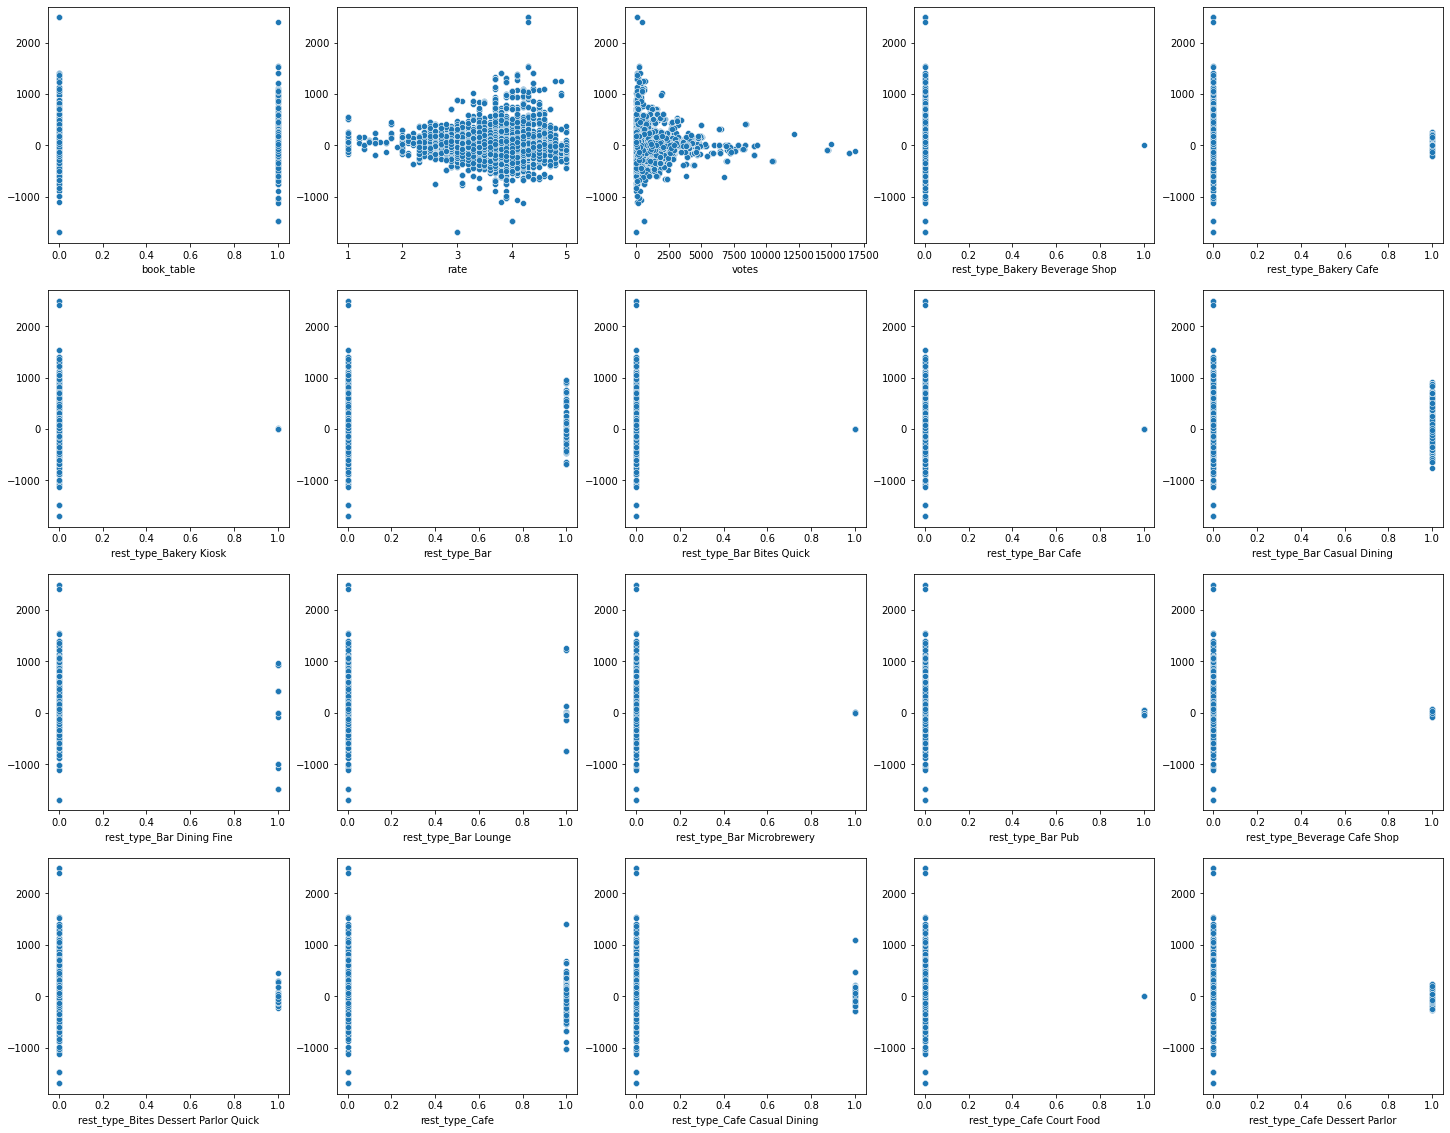

In [154]:
fig, ax = plt.subplots(nrows = 4, ncols= 5, figsize=(25, 20))

# use for loop to create scatter plot for residuals and each independent variable (do not consider the intercept)
# 'ax' assigns axes object to draw the plot onto 
for variable, subplot in zip(X_train_significant.columns[1:], ax.flatten()):
    sns.scatterplot(X_train_significant[variable], linreg_model_with_significant_var.resid , ax=subplot)

# display the plot
plt.show()

From the plots we see that none of the plots show a specific pattern. Hence, we may conclude that the variables are linearly related to the dependent variable.

**Normality of Residuals**

The assumption of normality is an important assumption for many statistical tests. The normal Q-Q plot is one way to assess normality. This q-q or quantile-quantile is a scatter plot which helps us validate the assumption of normal distribution in a data set.

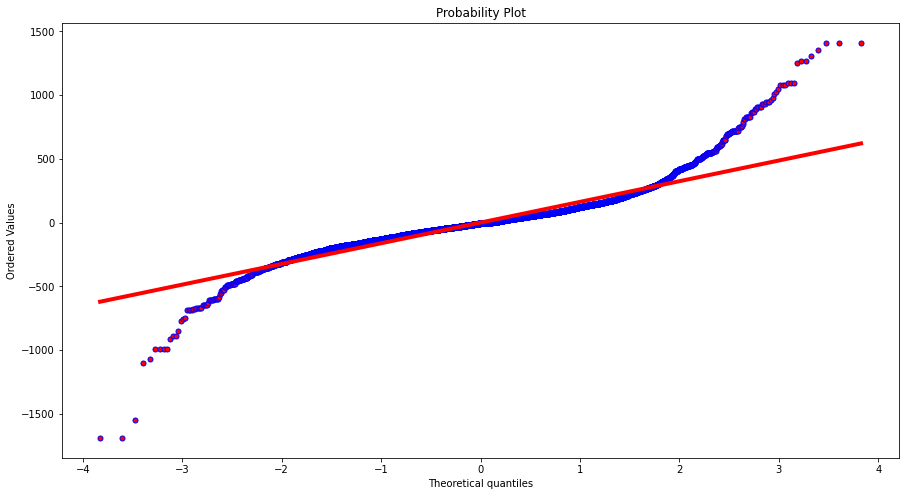

In [155]:
# calculate fitted values
fitted_vals = linreg_model_with_significant_var.predict(X_test_significant)

# calculate residuals
resids = actual_average_cost - fitted_vals

fig, ax = plt.subplots(1, 1, figsize=(15, 8))

stats.probplot(resids, plot=plt)

ax.get_lines()[0].set_marker('o')
ax.get_lines()[0].set_markersize(5.0)

ax.get_lines()[0].set_markerfacecolor('r')

# set the trend line width
ax.get_lines()[1].set_linewidth(4.0)

# display the plot
plt.show()

Using this plot, we can infer that the residuals do not come from a normal distribution. This is possible since our target variable is not normally distributed.

In [156]:
# check the mean of the residual
linreg_model_with_significant_var.resid.mean()

-1.4803547823273202e-10

The mean of the residuals is very much closer to zero. Therefore, we can say that linearity is present.

**Perform Jarque Bera test to check normality of the residuals**

In [157]:
# normality test using 'jarque_bera'
# the test returns the the test statistics and the p-value of the test
stat, p = jarque_bera(resids)

print('Statistics=%.3f, p-value=%.3f' % (stat, p))

# display the conclusion
# set the level of significance to 0.05
alpha = 0.05

# if the p-value is greater than alpha print we accept alpha 
# if the p-value is less than alpha print we reject alpha
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=47397.739, p-value=0.000
The data is not normally distributed (reject H0)


It is apparent that the p-value is less than 0.05. So we have enough evidence to reject the null hypothesis. It can be concluded that the residuals is not normally distributed.

### 4.4 Linear Regression after Removing Insignificant Variable (OLS) - Scaled Data

1. Perform standardization on train data

In [158]:
df_num_scaled = df_numeric_features.apply(lambda rec: (rec - rec.mean()) / rec.std())

# create a dataframe
# axis=1: specifies that the concatenation is column wise
df_average_cost_scaled = pd.concat([df_num_scaled, df_categoric_features], axis = 1)

# add constant to the data
df_average_cost_scaled =sm.add_constant(df_average_cost_scaled)

In [159]:
mean_numeric_features = df_numeric_features.mean()

# store the standard deviation as 'std_numeric_features'
std_numeric_features = df_numeric_features.std()

In [160]:
X = df_average_cost_scaled.drop(['average_cost','log_average_cost'], axis=1)

# extract the target variable from the train set
y = df_average_cost_scaled['average_cost']

# split data into train subset and test subset for predictor and target variables
# random_state: the seed used by the random number generator
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X, y, random_state=1)

# check the dimensions of the train & test subset for 

# print dimension of predictors train set
print("The shape of X_train_scaled is:",X_train_scaled.shape)

# print dimension of predictors test set
print("The shape of X_test_scaled is:",X_test_scaled.shape)

# print dimension of target train set
print("The shape of y_train_scaled is:",y_train_scaled.shape)

# print dimension of target test set
print("The shape of y_test_scaled is:",y_test_scaled.shape)

The shape of X_train_scaled is: (32024, 1803)
The shape of X_test_scaled is: (10675, 1803)
The shape of y_train_scaled is: (32024,)
The shape of y_test_scaled is: (10675,)


In [161]:
X_train_scaled_significant = X_train_scaled.drop(insigni_var, axis=1)
X_test_scaled_significant = X_test_scaled.drop(insigni_var, axis=1)

In [162]:
linreg_model_with_significant_scaled_vars = sm.OLS(list(y_train_scaled),X_train_scaled_significant).fit()

# to print the summary output
print(linreg_model_with_significant_scaled_vars.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     358.6
Date:                Sat, 25 Nov 2023   Prob (F-statistic):               0.00
Time:                        00:58:26   Log-Likelihood:                -12923.
No. Observations:               32024   AIC:                         2.703e+04
Df Residuals:                   31433   BIC:                         3.198e+04
Df Model:                         590                                         
Covariance Type:            nonrobust                                         
                                                                                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

This model explains 86.8% of the variation in dependent variable average cost.The Durbin-Watson test statistics is 2.005 and indicates that the is no autocorrelation. The Condition Number is 2.99e+18 suggests that there is severe collinearity

In [163]:
# predict the 'average cost' using predict()
predicted_average_cost = linreg_model_with_significant_scaled_vars.predict(X_test_scaled_significant)

# unscale the data
y_pred_unscaled = (predicted_average_cost * std_numeric_features.average_cost) + mean_numeric_features.average_cost

# extract the 'average cost' values from the test data
actual_average_cost = y_test_scaled

In [164]:
# calculate rmse using rmse()
linreg_model_with_significant_scaled_vars_rmse = rmse(actual_average_cost, y_pred_unscaled)

# calculate R-squared using rsquared
linreg_model_with_significant_scaled_vars_rsquared = linreg_model_with_significant_scaled_vars.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_model_with_significant_scaled_vars_rsquared_adj = linreg_model_with_significant_scaled_vars.rsquared_adj 

In [165]:
# compile the required information
linreg_model_with_significant_scaled_vars_metrics = pd.Series({
                     'Model_Name': "Linreg with scaled significant variables",
                     'RMSE': linreg_model_with_significant_scaled_vars_rmse,
                     'R-Squared': linreg_model_with_significant_scaled_vars_rsquared,
                     'Adj. R-Squared': linreg_model_with_significant_scaled_vars_rsquared_adj     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(linreg_model_with_significant_scaled_vars_metrics, ignore_index = True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model with log of target variable,0.820430,0.810025,175.988823
1,Linreg full model without log of target variable,0.882760,0.875967,164.312003
2,Linreg full model with significant variables,0.870642,0.868214,172.064117
3,Linreg with scaled significant variables,0.870642,0.868214,726.358677


On comparing the above models, it is seen that the RMSE value for the model considering scaled data is higher than the other model. Also the R-squared and Adj. R-squared values have slightly reduced. So, for further analysis we use the unscaled data

### 4.5 Linear Regression with Interaction (OLS)

In [166]:
df_average_cost_interaction = df_average_cost_dummy.copy()

# add the interaction variable
df_average_cost_interaction['rate*votes'] = df_average_cost_interaction['rate']*df_average_cost_interaction['votes'] 

# print the data with interaction
df_average_cost_interaction.head()

,const,online_order,book_table,rate,votes,average_cost,log_average_cost,rest_type_Bakery Beverage Shop,rest_type_Bakery Bites Quick,rest_type_Bakery Cafe,...,cuisines_Turkish,cuisines_Vietnamese,region_Eastern,region_North-Eastern,region_North-Western,region_Northern,region_South-Eastern,region_Southern,region_Western,rate*votes
0,1.0,1,1,4.1,775,800.0,6.684612,0,0,0,...,0,0,0,0,0,0,0,1,0,3177.5
1,1.0,1,0,4.1,787,800.0,6.684612,0,0,0,...,0,0,0,0,0,0,0,1,0,3226.7
2,1.0,1,0,3.8,918,800.0,6.684612,0,0,0,...,0,0,0,0,0,0,0,1,0,3488.4
3,1.0,0,0,3.7,88,300.0,5.703782,0,0,0,...,0,0,0,0,0,0,0,1,0,325.6
4,1.0,0,0,3.8,166,600.0,6.396930,0,0,0,...,0,0,0,0,0,0,0,1,0,630.8


In [167]:
# separate the independent and dependent variables
# drop(): specify the variables to be dropped
# axis=1: specifies that the columns are to be dropped
X = df_average_cost_interaction.drop(['average_cost','log_average_cost'], axis=1)

# extract the target variable from the train set
y = df_average_cost_interaction['average_cost']

# split data into train subset and test subset for predictor and target variables
# random_state: the seed used by the random number generator
X_train_interaction, X_test_interaction, y_train, y_test = train_test_split( X, y, random_state=1)

# check the dimensions of the train & test subset for 

# print dimension of predictors train set
print("The shape of X_train_interaction is:",X_train_interaction.shape)

# print dimension of predictors test set
print("The shape of X_test_interaction is:",X_test_interaction.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train_interaction is: (32024, 1804)
The shape of X_test_interaction is: (10675, 1804)
The shape of y_train is: (32024,)
The shape of y_test is: (10675,)


In [192]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg_with_interaction_lr=linreg.fit(X_train_interaction, y_train)

In [193]:
linreg_with_interaction_lr.score(X_train_interaction, y_train)

0.8828105916089737

In [199]:
# create a generalized function to calculate the RMSE values for train set
def get_train_rmse(model,X_train):
    
    # For training set:
    # train_pred: prediction made by the model on the training dataset 'X_train'
    # y_train: actual values ofthe target variable for the train dataset

    # predict the output of the target variable from the train data 
    train_pred = model.predict(X_train)

    # calculate the MSE using the "mean_squared_error" function

    # MSE for the train data
    mse_train = mean_squared_error(y_train, train_pred)

    # take the square root of the MSE to calculate the RMSE
    # round the value upto 4 digits using 'round()'
    rmse_train = round(np.sqrt(mse_train), 4)
    
    # return the training RMSE
    return(rmse_train)

In [200]:
# create a generalized function to calculate the RMSE values test set
def get_test_rmse(model,X_test):
    
    # For testing set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data
    test_pred = model.predict(X_test)

    # MSE for the test data
    mse_test = mean_squared_error(y_test, test_pred)

    # take the square root of the MSE to calculate the RMSE
    # round the value upto 4 digits using 'round()'
    rmse_test = round(np.sqrt(mse_test), 4)

    # return the test RMSE
    return(rmse_test)

In [201]:
# print training RMSE
print('RMSE on train set: ', get_train_rmse(linreg_with_interaction_lr,X_train_interaction))

# print training RMSE
print('RMSE on test set: ', get_test_rmse(linreg_with_interaction_lr,X_test_interaction))

# calculate the difference between train and test set RMSE
difference = abs(get_test_rmse(linreg_with_interaction_lr,X_test_interaction) - get_train_rmse(linreg_with_interaction_lr,X_train_interaction))

# print the difference between train and test set RMSE
print('Difference between RMSE on train and test set: ', difference)

RMSE on train set:  158.9457
RMSE on test set:  164.3149
Difference between RMSE on train and test set:  5.369200000000006


In [168]:
linreg_with_interaction = sm.OLS(y_train, X_train_interaction).fit()

# print the summary output
print(linreg_with_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:           average_cost   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     129.9
Date:                Sat, 25 Nov 2023   Prob (F-statistic):               0.00
Time:                        00:58:58   Log-Likelihood:            -2.0776e+05
No. Observations:               32024   AIC:                         4.190e+05
Df Residuals:                   30268   BIC:                         4.337e+05
Df Model:                        1755                                         
Covariance Type:            nonrobust                                         
                                                                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

This model explains 87.6% of the variation in dependent variable average cost.The Durbin-Watson test statistics is 2.004 and indicates that the is no autocorrelation. The Condition Number is 7.15e+21 suggests that there is severe collinearity. The collinearity is likely to increase because of the interaction effect.

In [169]:
predicted_average_cost = linreg_with_interaction.predict(X_test_interaction)

# extract the 'average_cost' values from the test data
actual_average_cost = y_test

In [170]:
# calculate rmse using rmse()
linreg_with_interaction_rmse = rmse(actual_average_cost, predicted_average_cost)

# calculate R-squared using rsquared
linreg_with_interaction_rsquared = linreg_with_interaction.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_with_interaction_rsquared_adj = linreg_with_interaction.rsquared_adj 

In [171]:
# compile the required information
linreg_with_interaction_metrics = pd.Series({
                     'Model_Name': "linreg_with_interaction",
                     'RMSE': linreg_with_interaction_rmse,
                     'R-Squared': linreg_with_interaction_rsquared,
                     'Adj. R-Squared': linreg_with_interaction_rsquared_adj     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(linreg_with_interaction_metrics, ignore_index = True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model with log of target variable,0.820430,0.810025,175.988823
1,Linreg full model without log of target variable,0.882760,0.875967,164.312003
2,Linreg full model with significant variables,0.870642,0.868214,172.064117
3,Linreg with scaled significant variables,0.870642,0.868214,726.358677
4,linreg_with_interaction,0.882811,0.876016,164.314882


From the summary output, the interaction component has a p-value of 0 indicating it is highly significant. The R-squared and adjusted R-squared value have also slightly increased. This output justifies that addition of an interaction effect has positively contributed to the performance of the model.

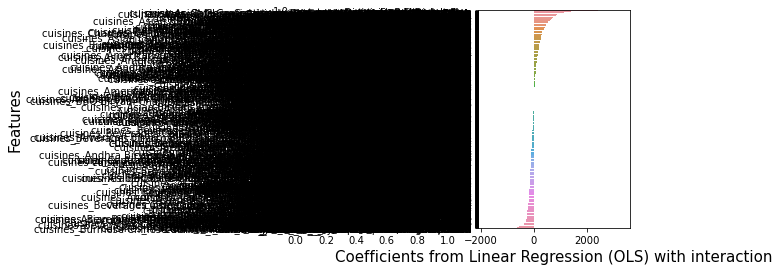

In [204]:
plt.subplot(1,2,1)
#plot_coefficients(linreg_model_with_significant_scaled_vars, 'Linear Regression (OLS) with scaled significant variables')

# pass the index of the plot as the third parameter of subplot()
plt.subplot(1,2,2)
plot_coefficients(linreg_with_interaction_lr, 'Linear Regression (OLS) with interaction')

# to adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

### 5. Regularization (OLS)

### 5.1 Ridge Regression (OLS)

In [172]:
col = list(X_train_scaled.columns)

# add 'Sum of square of Residuals' to the list
col.append('ssr')

# add 'R squared' to the list
col.append('R squared')

# add 'Adj. R squared' to the list
col.append('Adj. R squared')

# add 'Root mean Squared Error' to the list
col.append('RMSE')

In [173]:
ridge_regression = sm.OLS(y_train_scaled, X_train_scaled)

# the fitted ridge model
results_fu = ridge_regression.fit()

In [175]:
# create an empty list
frames = []

# a 'for' loop for values of alpha in a given range
# the loop prepares a table of regression coefficients for different values of alpha
for n in np.arange(0.0001,5.1, 0.5).tolist():
    
    # fit a rigde regression to the linear model built using OLS
    # L1_wt=0: conducts ridge regression
    # alpha: specifies the alpha value
    # start_params: starting values for patameters
    results_fr = ridge_regression.fit_regularized(L1_wt=0, alpha=n, start_params=results_fu.params)
    
    # fit the model
    # model: specifies the regression model
    # params: specifies the estimated parameters
    # normalized_cov_params: specifies the normalized covariance parameters
    results_fr_fit = sm.regression.linear_model.OLSResults(model=ridge_regression, 
                                             params=results_fr.params, 
                                             normalized_cov_params=ridge_regression.normalized_cov_params)
    
    # compute the rmse
    # calling the test data
    results_fr_fit_predictions = results_fr_fit.predict(X_test_scaled)
    
    # obtain the rmse
    results_fr_fit_rmse = rmse(y_test, results_fr_fit_predictions)    
  
    # compile the necessary metrics used for comparing the models
    list_metric = [results_fr_fit.ssr, results_fr_fit.rsquared, results_fr_fit.rsquared_adj, results_fr_fit_rmse]
    
    # append the empty list 
    frames.append(np.append(results_fr.params, list_metric))
    
    # converting the list to a dataframe.
    df_params = pd.DataFrame(frames, columns= col)

# add column names to the dataframe  
df_params.index=np.arange(0.0001, 5.1, 0.5).tolist()

# add the first column name alpha to the data frame. 
# this column will hold the regularization parameter value which can be anything from zero to any positive number
df_params.index.name = 'alpha*'

# display the output
df_params

,const,online_order,book_table,rate,votes,rest_type_Bakery Beverage Shop,rest_type_Bakery Bites Quick,rest_type_Bakery Cafe,rest_type_Bakery Court Food,rest_type_Bakery Dessert Parlor,...,region_North-Eastern,region_North-Western,region_Northern,region_South-Eastern,region_Southern,region_Western,ssr,R squared,Adj. R squared,RMSE
alpha*,,,,,,,,,,,,,,,,,,,,,
0.0001,0.177219,-0.015167,0.202079,0.049667,0.038875,-0.230328,-0.189323,-0.074781,0.029716,-0.193034,...,-0.099643,-0.040339,-0.075058,-0.120519,-0.109621,-0.104637,4275.904524,0.868386,0.860760,744.385489
0.5001,0.035786,-0.101001,0.324963,0.108375,0.119493,-0.000024,-0.003272,-0.000490,-0.000003,-0.003449,...,-0.006577,0.002794,-0.002700,-0.038822,-0.025686,-0.003348,17998.441210,0.446003,0.413900,744.671722
1.0001,0.017987,-0.078608,0.254576,0.099777,0.108511,-0.000014,-0.001776,-0.000170,-0.000003,-0.001808,...,-0.003870,0.001503,-0.001635,-0.024175,-0.015594,-0.001838,19838.851294,0.389354,0.353969,744.716134
1.5001,0.011319,-0.064064,0.209737,0.089521,0.096577,-0.000010,-0.001270,-0.000086,-0.000003,-0.001251,...,-0.002951,0.000999,-0.001228,-0.017844,-0.011581,-0.001322,21275.460403,0.345135,0.307188,744.743630
2.0001,0.007929,-0.054005,0.178614,0.080369,0.086257,-0.000008,-0.001005,-0.000050,-0.000003,-0.000965,...,-0.002442,0.000737,-0.000997,-0.014230,-0.009332,-0.001050,22433.886503,0.309478,0.269465,744.762737
2.5001,0.005930,-0.046658,0.155672,0.072609,0.077649,-0.000007,-0.000838,-0.000031,-0.000003,-0.000789,...,-0.002103,0.000578,-0.000845,-0.011869,-0.007863,-0.000878,23384.267336,0.280225,0.238517,744.776888
3.0001,0.004637,-0.041064,0.138025,0.066078,0.070478,-0.000006,-0.000721,-0.000020,-0.000002,-0.000669,...,-0.001855,0.000473,-0.000736,-0.010197,-0.006815,-0.000757,24175.716915,0.255864,0.212744,744.787824
3.5001,0.003748,-0.036664,0.124011,0.060554,0.064456,-0.000005,-0.000635,-0.000013,-0.000002,-0.000581,...,-0.001663,0.000398,-0.000653,-0.008947,-0.006024,-0.000667,24843.727056,0.235303,0.190991,744.796543
4.0001,0.003106,-0.033115,0.112603,0.055843,0.059346,-0.000005,-0.000567,-0.000008,-0.000002,-0.000514,...,-0.001509,0.000343,-0.000587,-0.007974,-0.005404,-0.000597,25414.350034,0.217739,0.172409,744.803664


In [176]:
# call the first two rows and last two rows
df_params.iloc[[0,1,-2,-1]]

,const,online_order,book_table,rate,votes,rest_type_Bakery Beverage Shop,rest_type_Bakery Bites Quick,rest_type_Bakery Cafe,rest_type_Bakery Court Food,rest_type_Bakery Dessert Parlor,...,region_North-Eastern,region_North-Western,region_Northern,region_South-Eastern,region_Southern,region_Western,ssr,R squared,Adj. R squared,RMSE
alpha*,,,,,,,,,,,,,,,,,,,,,
0.0001,0.177219,-0.015167,0.202079,0.049667,0.038875,-0.230328,-0.189323,-0.074781,0.029716,-0.193034,...,-0.099643,-0.040339,-0.075058,-0.120519,-0.109621,-0.104637,4275.904524,0.868386,0.860760,744.385489
0.5001,0.035786,-0.101001,0.324963,0.108375,0.119493,-0.000024,-0.003272,-0.000490,-0.000003,-0.003449,...,-0.006577,0.002794,-0.002700,-0.038822,-0.025686,-0.003348,17998.441210,0.446003,0.413900,744.671722
4.5001,0.002626,-0.030191,0.103132,0.051789,0.054967,-0.000004,-0.000514,-0.000005,-0.000002,-0.000461,...,-0.001382,0.000301,-0.000534,-0.007196,-0.004903,-0.000541,25907.002276,0.202575,0.156366,744.809593
5.0001,0.002257,-0.027741,0.095140,0.048269,0.051177,-0.000004,-0.000469,-0.000003,-0.000002,-0.000419,...,-0.001275,0.000268,-0.000489,-0.006558,-0.004490,-0.000495,26336.378422,0.189359,0.142384,744.814607


In [177]:
alpha = df_params.RMSE[df_params.RMSE == df_params.loc[:,'RMSE'].min()].index.tolist()

# print the conclusion
print('The required alpha is %.4f ' % (alpha[0]))

The required alpha is 0.0001 


In [178]:
df_params.apply(lambda x: sum(x.values==0),axis=1)

alpha*
0.0001    0
0.5001    0
1.0001    0
1.5001    0
2.0001    0
2.5001    0
3.0001    0
3.5001    0
4.0001    0
4.5001    0
5.0001    0
dtype: int32

In [179]:
results_fr = ridge_regression.fit_regularized(L1_wt=0, alpha=0.0001, start_params=results_fu.params)

# fit the model 
# model: specifies the regression model
# params: specifies the estimated parameters
# normalized_cov_params: specifies the normalized covariance parameters
ridge_regression_best = sm.regression.linear_model.OLSResults(model = ridge_regression, 
                                        params=results_fr.params, 
                                        normalized_cov_params=ridge_regression.normalized_cov_params)

# print the summary output 
print (ridge_regression_best.summary())

                            OLS Regression Results                            
Dep. Variable:           average_cost   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     113.9
Date:                Sat, 25 Nov 2023   Prob (F-statistic):               0.00
Time:                        01:17:33   Log-Likelihood:                -13200.
No. Observations:               32024   AIC:                         2.991e+04
Df Residuals:                   30269   BIC:                         4.461e+04
Df Model:                        1754                                         
Covariance Type:            nonrobust                                         
                                                                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

In [180]:
predicted_average_cost = ridge_regression_best.predict(X_test_scaled)

# unscale the data
y_pred_unscaled = (predicted_average_cost * std_numeric_features.average_cost) + mean_numeric_features.average_cost

# extract the 'claim' values from the test data
actual_average_cost = y_test

In [181]:
# calculate rmse using rmse()
ridge_regression_best_rmse = rmse(actual_average_cost, y_pred_unscaled)

# calculate R-squared using rsquared
ridge_regression_best_rsquared = ridge_regression_best.rsquared

# calculate Adjusted R-Squared using rsquared_adj
ridge_regression_best_rsquared_adj = ridge_regression_best.rsquared_adj 

In [182]:
# compile the required information
ridge_regression_best_metrics = pd.Series({
                     'Model_Name': "Ridge Regression",
                     'RMSE': ridge_regression_best_rmse,
                     'R-Squared': ridge_regression_best_rsquared,
                     'Adj. R-Squared': ridge_regression_best_rsquared_adj     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(ridge_regression_best_metrics, ignore_index = True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model with log of target variable,0.820430,0.810025,175.988823
1,Linreg full model without log of target variable,0.882760,0.875967,164.312003
2,Linreg full model with significant variables,0.870642,0.868214,172.064117
3,Linreg with scaled significant variables,0.870642,0.868214,726.358677
4,linreg_with_interaction,0.882811,0.876016,164.314882
5,Ridge Regression,0.868386,0.860760,171.977412


### 5.2 Lasso Regression (OLS)

In [183]:
lasso_regression = sm.OLS(y_train_scaled, X_train_scaled)

# the fitted lasso model
results_fu = lasso_regression.fit()

In [184]:
# create an empty list
frames = []

# a 'for' loop for values of alpha in a given range
# the loop prepares a table of regression coefficients for different values of alpha
for n in np.arange(0.0001, 0.02, 0.005).tolist():
    
    # fit a lasso regression to the linear model built using OLS
    # L1_wt=1: conducts lasso regression
    # alpha: specifies the alpha value
    # start_params: starting values for patameters
    results_fr = lasso_regression.fit_regularized(L1_wt=1, alpha=n, start_params=results_fu.params)
     
    # fit the model 
    # model: specifies the regression model
    # params: specifies the estimated parameters
    # normalized_cov_params: specifies the normalized covariance parameters
    results_fr_fit = sm.regression.linear_model.OLSResults(model=lasso_regression, 
                                                params=results_fr.params, 
                                                normalized_cov_params=lasso_regression.normalized_cov_params)
    
    # calculate the rmse
    # predict the claim on test data
    results_fr_fit_predictions = results_fr_fit.predict(X_test_scaled)
    
    # obtain the rmse
    results_fr_fit_rmse = rmse(y_test, results_fr_fit_predictions)    
  
    # compile the necessary metrics used for comparing the models
    list_metric = [results_fr_fit.ssr, results_fr_fit.rsquared, results_fr_fit.rsquared_adj, results_fr_fit_rmse]
    
    # append the empty list 
    frames.append(np.append(results_fr.params, list_metric))
    
    # convert the list to a dataframe
    df_params = pd.DataFrame(frames, columns= col)

# add column names to the dataframe    
df_params.index=np.arange(0.0001, 0.02, 0.005).tolist()

# add the first column name alpha to the data frame
# this column will hold the regularization parameter value which can be anything from zero to any positive number
df_params.index.name = 'alpha*'

# display output
df_params

,const,online_order,book_table,rate,votes,rest_type_Bakery Beverage Shop,rest_type_Bakery Bites Quick,rest_type_Bakery Cafe,rest_type_Bakery Court Food,rest_type_Bakery Dessert Parlor,...,region_North-Eastern,region_North-Western,region_Northern,region_South-Eastern,region_Southern,region_Western,ssr,R squared,Adj. R squared,RMSE
alpha*,,,,,,,,,,,,,,,,,,,,,
0.0001,-0.233282,-0.012340,0.192602,0.051122,0.045949,0.0,0.0,0.248785,0.0,0.0,...,-0.073948,-0.018864,-0.04879,-0.100519,-0.099709,-0.09124,4717.284503,0.854801,0.846387,744.395795
0.0051,0.000000,-0.076972,0.350652,0.081058,0.113203,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.00000,-0.062276,0.000000,0.00000,11324.385432,0.651432,0.631234,744.518167
0.0101,0.000000,-0.095618,0.394557,0.074188,0.114766,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,12731.268923,0.608128,0.585420,744.550282
0.0151,0.049298,-0.110335,0.427165,0.073061,0.112512,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,14352.607885,0.558223,0.532623,744.578422


In [185]:
# call the first two rows and last two rows
df_params.iloc[[0,1,-2,-1]]

,const,online_order,book_table,rate,votes,rest_type_Bakery Beverage Shop,rest_type_Bakery Bites Quick,rest_type_Bakery Cafe,rest_type_Bakery Court Food,rest_type_Bakery Dessert Parlor,...,region_North-Eastern,region_North-Western,region_Northern,region_South-Eastern,region_Southern,region_Western,ssr,R squared,Adj. R squared,RMSE
alpha*,,,,,,,,,,,,,,,,,,,,,
0.0001,-0.233282,-0.012340,0.192602,0.051122,0.045949,0.0,0.0,0.248785,0.0,0.0,...,-0.073948,-0.018864,-0.04879,-0.100519,-0.099709,-0.09124,4717.284503,0.854801,0.846387,744.395795
0.0051,0.000000,-0.076972,0.350652,0.081058,0.113203,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.00000,-0.062276,0.000000,0.00000,11324.385432,0.651432,0.631234,744.518167
0.0101,0.000000,-0.095618,0.394557,0.074188,0.114766,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,12731.268923,0.608128,0.585420,744.550282
0.0151,0.049298,-0.110335,0.427165,0.073061,0.112512,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,14352.607885,0.558223,0.532623,744.578422


In [186]:
alpha = df_params.RMSE[df_params.RMSE == df_params.loc[:,'RMSE'].min()].index.tolist()

# print the conclusion
print('The required alpha is %.4f ' % (alpha[0]))

The required alpha is 0.0001 


In [187]:
# check for zeros in the above coefficients table
df_params.apply(lambda x: sum(x.values==0),axis=1)

alpha*
0.0001    1327
0.0051    1785
0.0101    1792
0.0151    1791
dtype: int32

In [205]:
# fit the lasso regression model
# L1_wt=1: conducts lasso regression
# alpha: specifies the alpha value
# start_params: starting values for patameters
results_fr = lasso_regression.fit_regularized(L1_wt=1, alpha=0.0001, start_params=results_fu.params)

# fit the lasso regression 
# model: specifies the regression model
# params: specifies the estimated parameters
# normalized_cov_params: specifies the normalized covariance parameters
lasso_regression_best = sm.regression.linear_model.OLSResults(model=lasso_regression, 
                                              params=results_fr.params, 
                                              normalized_cov_params=lasso_regression.normalized_cov_params)

# print the summary output
print (lasso_regression_best.summary())

                            OLS Regression Results                            
Dep. Variable:           average_cost   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     101.6
Date:                Sat, 25 Nov 2023   Prob (F-statistic):               0.00
Time:                        02:02:22   Log-Likelihood:                -14773.
No. Observations:               32024   AIC:                         3.306e+04
Df Residuals:                   30269   BIC:                         4.775e+04
Df Model:                        1754                                         
Covariance Type:            nonrobust                                         
                                                                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

In [206]:
predicted_average_cost = lasso_regression_best.predict(X_test_scaled)

# unscale the data
y_pred_unscaled = (predicted_average_cost * std_numeric_features.average_cost) + mean_numeric_features.average_cost

# extract the 'claim' values from the test data
actual_average_cost = y_test

In [207]:
# calculate rmse using rmse()
lasso_regression_best_rmse = rmse(actual_average_cost, y_pred_unscaled)

# calculate R-squared using rsquared
lasso_regression_best_rsquared = lasso_regression_best.rsquared

# calculate Adjusted R-Squared using rsquared_adj
lasso_regression_best_rsquared_adj = lasso_regression_best.rsquared_adj 

In [208]:
# compile the required information
lasso_regression_best_metrics = pd.Series({
                     'Model_Name': "Lasso Regression",
                     'RMSE': lasso_regression_best_rmse,
                     'R-Squared': lasso_regression_best_rsquared,
                     'Adj. R-Squared': lasso_regression_best_rsquared_adj     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(lasso_regression_best_metrics, ignore_index = True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model with log of target variable,0.820430,0.810025,175.988823
1,Linreg full model without log of target variable,0.882760,0.875967,164.312003
2,Linreg full model with significant variables,0.870642,0.868214,172.064117
3,Linreg with scaled significant variables,0.870642,0.868214,726.358677
4,linreg_with_interaction,0.882811,0.876016,164.314882
5,Ridge Regression,0.868386,0.860760,171.977412
6,Lasso Regression,0.854801,0.846387,181.557987


### 5.3 Elastic Net Regression (OLS)

In [209]:
elastic_net_regression = sm.OLS(y_train_scaled, X_train_scaled)

# the fitted elastic net model
results_fu = elastic_net_regression.fit()

In [210]:
elastic = ElasticNet()

# use gridsearchCV to find best penalty term 
# estimator: the method used to estimate the parameter of regression
# param_grid: dictionary with parameters names (string) as keys and lists of parameter settings to try as values
# scoring: a single string or a callable to evaluate the predictions on the test set
# n_jobs: number of jobs to run in parallel
# refit: refit an estimator using the best found parameters on the whole dataset
# CV: determines the cross-validation splitting strategy
search = GridSearchCV(estimator=elastic, 
                      param_grid={'l1_ratio':[.2,.4,.6,.8]},
                      scoring='neg_mean_squared_error', 
                      n_jobs=1, 
                      refit=True, 
                      cv=5)

In [211]:
search.fit(X_train_scaled, y_train_scaled)

# get best parameter
search.best_params_

{'l1_ratio': 0.2}

In [212]:
# create an empty list
frames = []

# a 'for' loop for values of alpha in a given range
# the loop prepares a table of regression coefficients for different values of alpha
for n in np.arange(0.0001, 1.0, 0.1).tolist():
    
    # fitting a elastic net regression to the elastic net model built using OLS 
    # the l1_ratio is the same as l1_wt in the below function
    # L1_wt=0.8: conducts elastic net regression
    # alpha: specifies the alpha value
    # start_params: starting values for patameters
    results_fr = elastic_net_regression.fit_regularized(method='elastic_net', 
                                                        L1_wt= 0.2, 
                                                        alpha=n, 
                                                        start_params=results_fu.params)
     
    # obtaining the parameters of the fitted model 
    # model: specifies the regression model
    # params: specifies the estimated parameters
    # normalized_cov_params: specifies the normalized covariance parameters
    results_fr_fit = sm.regression.linear_model.OLSResults(model=elastic_net_regression, 
                                    params=results_fr.params, 
                                    normalized_cov_params=elastic_net_regression.normalized_cov_params)
    
    # calculate rmse
    # call the test data
    results_fr_fit_predictions = results_fr_fit.predict(X_test_scaled)
    
    # obtaining the rmse
    results_fr_fit_rmse = rmse(y_test, results_fr_fit_predictions)    
  
    # compiling the necessary metrics used for comparing the models
    list_metric = [results_fr_fit.ssr, results_fr_fit.rsquared, results_fr_fit.rsquared_adj, results_fr_fit_rmse]
    
    # appending the empty list 
    frames.append(np.append(results_fr.params, list_metric))
    
    # converting the list to a dataframe
    df_params = pd.DataFrame(frames, columns= col)

# add column names to the dataframe    
df_params.index=np.arange(0.0001, 1.0, 0.1).tolist()

# add the first column name alpha to the data frame
# this column will hold the regularization parameter value which can be anything from zero to any positive number
df_params.index.name = 'alpha*'

# display output
df_params

,const,online_order,book_table,rate,votes,rest_type_Bakery Beverage Shop,rest_type_Bakery Bites Quick,rest_type_Bakery Cafe,rest_type_Bakery Court Food,rest_type_Bakery Dessert Parlor,...,region_North-Eastern,region_North-Western,region_Northern,region_South-Eastern,region_Southern,region_Western,ssr,R squared,Adj. R squared,RMSE
alpha*,,,,,,,,,,,,,,,,,,,,,
0.0001,-0.134427,-0.014583,0.200456,0.049976,0.041640,0.0,0.0,0.186499,0.0,-0.092399,...,-0.078001,-0.02255,-0.053767,-0.09847,-0.092136,-0.088534,4360.507745,0.865782,0.858005,744.390400
0.1001,0.000000,-0.118264,0.433916,0.090650,0.108946,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,17183.250694,0.471095,0.440446,744.650336
0.2001,0.000000,-0.094822,0.406321,0.085422,0.103282,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,18099.901753,0.442880,0.410596,744.678999
0.3001,0.000000,-0.073446,0.377301,0.078812,0.096519,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,18917.764575,0.417706,0.383963,744.700094
0.4001,0.000000,-0.054970,0.349334,0.071713,0.088853,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,19743.773172,0.392281,0.357065,744.715624
0.5001,0.000000,-0.038833,0.322791,0.064354,0.080691,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,20539.916914,0.367775,0.331140,744.726316
0.6001,0.000000,-0.024273,0.298621,0.056885,0.072480,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,21371.783515,0.342170,0.304051,744.736784
0.7001,0.000000,-0.011082,0.276518,0.049447,0.064355,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,22223.966482,0.315940,0.276301,744.746896
0.8001,0.000000,0.000000,0.255888,0.041994,0.056244,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,23041.949195,0.290762,0.249664,744.757361


In [213]:
# to call the first two rows and last two rows
df_params.iloc[[0,1,-2,-1]]

,const,online_order,book_table,rate,votes,rest_type_Bakery Beverage Shop,rest_type_Bakery Bites Quick,rest_type_Bakery Cafe,rest_type_Bakery Court Food,rest_type_Bakery Dessert Parlor,...,region_North-Eastern,region_North-Western,region_Northern,region_South-Eastern,region_Southern,region_Western,ssr,R squared,Adj. R squared,RMSE
alpha*,,,,,,,,,,,,,,,,,,,,,
0.0001,-0.134427,-0.014583,0.200456,0.049976,0.041640,0.0,0.0,0.186499,0.0,-0.092399,...,-0.078001,-0.02255,-0.053767,-0.09847,-0.092136,-0.088534,4360.507745,0.865782,0.858005,744.390400
0.1001,0.000000,-0.118264,0.433916,0.090650,0.108946,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,17183.250694,0.471095,0.440446,744.650336
0.8001,0.000000,0.000000,0.255888,0.041994,0.056244,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,23041.949195,0.290762,0.249664,744.757361
0.9001,0.000000,0.000000,0.235848,0.034715,0.047972,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,23674.391258,0.271295,0.229069,744.768322


In [214]:
alpha = df_params.RMSE[df_params.RMSE == df_params.loc[:,'RMSE'].min()].index.tolist()

# print the conclusion
print('The required alpha is %.4f ' % (alpha[0]))

The required alpha is 0.0001 


In [215]:
# check for zeros in the above coefficients table
df_params.apply(lambda x: sum(x.values==0),axis=1)

alpha*
0.0001     648
0.1001    1794
0.2001    1797
0.3001    1797
0.4001    1798
0.5001    1798
0.6001    1798
0.7001    1798
0.8001    1800
0.9001    1800
dtype: int32

In [216]:
# fit the elastic net regression model
results_fr = elastic_net_regression.fit_regularized(method='elastic_net', 
                                                    L1_wt=0.2, 
                                                    alpha=0.0001, 
                                                    start_params=results_fu.params)

# fit elastic net regression
# model: specifies the regression model
# params: specifies the estimated parameters
# normalized_cov_params: specifies the normalized covariance parameters
elastic_net_regression_best = sm.regression.linear_model.OLSResults(model=elastic_net_regression, 
                                              params=results_fr.params, 
                                              normalized_cov_params=elastic_net_regression.normalized_cov_params)

# print the summary output
print (elastic_net_regression_best.summary())

                            OLS Regression Results                            
Dep. Variable:           average_cost   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     111.3
Date:                Sat, 25 Nov 2023   Prob (F-statistic):               0.00
Time:                        03:18:21   Log-Likelihood:                -13514.
No. Observations:               32024   AIC:                         3.054e+04
Df Residuals:                   30269   BIC:                         4.523e+04
Df Model:                        1754                                         
Covariance Type:            nonrobust                                         
                                                                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

In [217]:
# predict the 'average_cost' using predict()
predicted_average_cost = elastic_net_regression_best.predict(X_test_scaled)

# unscale the data
y_pred_unscaled = (predicted_average_cost * std_numeric_features.average_cost) + mean_numeric_features.average_cost

# extract the 'average_cost' values from the test data
actual_average_cost = y_test

In [218]:
# calculate rmse using rmse()
elastic_net_regression_best_rmse = rmse(actual_average_cost, y_pred_unscaled)

# calculate R-squared using rsquared
elastic_net_regression_best_rsquared = elastic_net_regression_best.rsquared

# calculate Adjusted R-Squared using rsquared_adj
elastic_net_regression_best_rsquared_adj = elastic_net_regression_best.rsquared_adj 

In [219]:
# compile the required information
elastic_net_regression_best_metrics = pd.Series({
                     'Model_Name': "Elastic net Regression",
                     'RMSE': elastic_net_regression_best_rmse,
                     'R-Squared': elastic_net_regression_best_rsquared,
                     'Adj. R-Squared': elastic_net_regression_best_rsquared_adj     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(elastic_net_regression_best_metrics, ignore_index = True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model with log of target variable,0.820430,0.810025,175.988823
1,Linreg full model without log of target variable,0.882760,0.875967,164.312003
2,Linreg full model with significant variables,0.870642,0.868214,172.064117
3,Linreg with scaled significant variables,0.870642,0.868214,726.358677
4,linreg_with_interaction,0.882811,0.876016,164.314882
5,Ridge Regression,0.868386,0.860760,171.977412
6,Lasso Regression,0.854801,0.846387,181.557987
7,Elastic net Regression,0.865782,0.858005,173.964896


### 6. Stochastic Gradient Descent - SGD

In [220]:
from sklearn.linear_model import SGDRegressor

# build the model
linreg_with_SGD = SGDRegressor()

# we fit our model with train data
linreg_with_SGD = linreg_with_SGD.fit(X_train, y_train)

In [221]:
# we use predict() to predict our values
linreg_with_SGD_predictions = linreg_with_SGD.predict(X_test)

In [222]:
# calculate mse
linreg_SGD_mse = mean_squared_error(y_test, linreg_with_SGD_predictions)

# calculate rmse
linreg_SGD_rmse = np.sqrt(linreg_SGD_mse)

# calculate R-squared
linreg_SGD_r_squared = r2_score(y_test, linreg_with_SGD_predictions)

# calculate Adjusted R-squared
linreg_SGD_adjusted_r_squared = 1 - (1-linreg_SGD_r_squared)*(len(y_test)-1)/(len(y_test)- X_test.shape[1]-1)

In [223]:
# compile the required information
linreg_full_model_SGD = pd.Series({
                     'Model_Name': "Linear Regression SGD",
                     'RMSE': linreg_SGD_rmse ,
                     'R-Squared': linreg_SGD_r_squared,
                     'Adj. R-Squared': linreg_SGD_adjusted_r_squared   
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(linreg_full_model_SGD, ignore_index = True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model with log of target variable,8.204302e-01,8.100247e-01,1.759888e+02
1,Linreg full model without log of target variable,8.827604e-01,8.759667e-01,1.643120e+02
2,Linreg full model with significant variables,8.706421e-01,8.682141e-01,1.720641e+02
3,Linreg with scaled significant variables,8.706421e-01,8.682141e-01,7.263587e+02
4,linreg_with_interaction,8.828106e-01,8.760157e-01,1.643149e+02
5,Ridge Regression,8.683864e-01,8.607598e-01,1.719774e+02
6,Lasso Regression,8.548006e-01,8.463867e-01,1.815580e+02
7,Elastic net Regression,8.657823e-01,8.580048e-01,1.739649e+02
8,Linear Regression SGD,-1.151426e+21,-1.385450e+21,1.529626e+13


### 6.2 Linear Regression with SGD using GridSearchCV

In [333]:
# to supress the warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import gridsearchcv from sklearn to optimize best parameter
from sklearn.model_selection import GridSearchCV

# Grid search 

# alpha is regularization term usually in the range 10.0**-np.arange(1,7).
# this will generate different alpha values like 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06

# loss="squared_loss": Ordinary least squares, 

# "l2": L2 norm penalty on coefficients (ridge regression), 
# "l1": L1 norm penalty on coefficients(lasso regression), "elasticnet": Convex combination of L2 and L1    
   
# The learning rate can be either constant or gradually decaying 
    
param_grid = {
    'alpha': 10.0 ** -np.arange(1, 4),
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
}

# using sklearn’s GridSearchCV, we define our grid of parameters to search over and then run the grid search
clf = GridSearchCV(linreg_with_SGD, param_grid)

# fit the model on train data
clf.fit(X_train, y_train)

ValueError: 
All the 270 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dhind\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dhind\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 1582, in fit
    self._validate_params()
  File "C:\Users\dhind\anaconda3\lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\dhind\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py", line 97, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'loss' parameter of SGDRegressor must be a str among {'huber', 'squared_error', 'squared_epsilon_insensitive', 'epsilon_insensitive'}. Got 'squared_loss' instead.


In [ ]:
# print the best parameters
# print best alpha value
print('Best alpha:', clf.best_estimator_.alpha)

# print best tolerance
print('Best tol:', clf.best_estimator_.tol) 

# print best starting rate (Use eta0 to specify the starting learning)
print('Best eta0:', clf.best_estimator_.eta0)

# print best learning rate
print('Best learning rate:', clf.best_estimator_.learning_rate) 

In [ ]:
linreg_SGD_using_best_parameter = SGDRegressor(alpha=,
                                               eta0=, 
                                               learning_rate=)

# fit the SGD model using best parameter
linreg_SGD_using_best_parameter.fit(X_train,y_train)

In [ ]:
# predict the values on test data using predict
linreg_SGD_using_best_parameter_predictions = linreg_SGD_using_best_parameter.predict(X_test)

In [ ]:
# calculate mse
linreg_SGD_using_best_parameter_mse = mean_squared_error(y_test, linreg_SGD_using_best_parameter_predictions)

# calculate rmse
linreg_SGD_using_best_parameter_rmse = np.sqrt(linreg_SGD_using_best_parameter_mse)

# calculate R-squared
linreg_SGD_using_best_parameter_r_squared = r2_score(y_test, linreg_SGD_using_best_parameter_predictions)

# calculate Adjusted R-squared
linreg_SGD_using_best_parameter_adjusted_r_squared = 1 - (1-linreg_SGD_using_best_parameter_r_squared)*(len(y_test)-1)/(len(y_test)- X_test.shape[1]-1)

In [ ]:
# compile the required information
linreg_full_model_SGD = pd.Series({
                     'Model_Name': "Linear Regression SGD",
                     'RMSE': linreg_SGD_using_best_parameter_rmse ,
                     'R-Squared': linreg_SGD_using_best_parameter_r_squared,
                     'Adj. R-Squared': linreg_SGD_using_best_parameter_adjusted_r_squared   
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(linreg_full_model_SGD, ignore_index = True)

# print the result table
score_card

### 7. Ensemble Methods

### 7.1 Random Forest Regressor Model

In [334]:
rfreg = RandomForestRegressor()
rfreg.fit(X_train,y_train)
y_pred_rfreg = rfreg.predict(X_test)

tuned_parameters = {'n_estimators': [250,500,1000,1200]}

grd_regressor = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=10, 
                   n_jobs=-1, verbose=1, scoring=mean_squared_error)
grd_regressor.fit(X_train, y_train)

print(grd_regressor.best_params_)

rfreg_best = RandomForestRegressor(n_estimators=500)
rfreg_best.fit(X_train,y_train)
y_pred_rfreg_best = rfreg_best.predict(X_test)

mse(y_test, y_pred_rfreg_best)

In [ ]:
# calculate mse
rfreg_mse = mean_squared_error(y_test, rfreg)

# calculate rmse
rfreg_rmse = np.sqrt(rfreg_mse)

# calculate R-squared
rfreg_r_squared = r2_score(y_test, y_pred_rfreg)

# calculate Adjusted R-squared
rfreg_adjusted_r_squared = 1 - (1-rfreg_r_squared)*(len(y_test)-1)/(len(y_test)- X_test.shape[1]-1)

In [ ]:
base_imp = imp_df(X_train.columns, rfreg.feature_importances_)
var_imp_plot(base_imp[:10],"Top 10 features")

In [ ]:
# compile the required information
rfreg_model = pd.Series({
                     'Model_Name': "Random Forest Regression",
                     'RMSE': rfreg_rmse ,
                     'R-Squared': rfreg_r_squared,
                     'Adj. R-Squared': rfreg_adjusted_r_squared   
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.apperfreg_modelrfreg, ignore_index = True)

# print the result table
score_card

### 7.2 XGboost Regressor Model

In [ ]:
xg=XGBRegressor()
xg.fit(X_train,y_train)
ypred_xg=xg.predict(X_test)

In [ ]:
# calculate mse
xg_mse = mean_squared_error(y_test, xg)

# calculate rmse
xg_rmse = np.sqrt(xg_mse)

# calculate R-squared
xg_r_squared = r2_score(y_test, y_pred_xg)

# calculate Adjusted R-squared
xg_adjusted_r_squared = 1 - (1-xg_r_squared)*(len(y_test)-1)/(len(y_test)- X_test.shape[1]-1)

In [ ]:
# compile the required information
rfreg_model = pd.Series({
                     'Model_Name': "XGBoost Regression",
                     'RMSE': xg_rmse ,
                     'R-Squared': xg_r_squared,
                     'Adj. R-Squared': xg_adjusted_r_squared   
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(xg, ignore_index = True)

# print the result table
score_card

In [1]:
import pandas as pd

score_card=pd.read_clipboard()
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model with log of target variable,8.204302e-01,8.100247e-01,1.759888e+02
1,Linreg full model without log of target variable,8.827604e-01,8.759667e-01,1.643120e+02
2,Linreg full model with significant variables,8.706421e-01,8.682141e-01,1.720641e+02
3,Linreg with scaled significant variables,8.706421e-01,8.682141e-01,7.263587e+02
4,linreg_with_interaction,8.828106e-01,8.760157e-01,1.643149e+02
5,Ridge Regression,8.683864e-01,8.607598e-01,1.719774e+02
6,Lasso Regression,8.548006e-01,8.463867e-01,1.815580e+02
7,Elastic net Regression,8.657823e-01,8.580048e-01,1.739649e+02
8,Linear Regression SGD,-1.151426e+21,-1.385450e+21,1.529626e+13


In [31]:
score_card.drop([8],inplace=True)

In [32]:
import plotly.graph_objects as go
models=score_card['Model_Name']
r2_values=round(score_card['R-Squared']*100,2)
adj_r2_values=round(score_card['Adj. R-Squared']*100,2)

# Create traces for R2 and adjusted R2
trace_r2 = go.Bar(x=models, y=r2_values, name='R2', marker=dict(color='blue'))
trace_adj_r2 = go.Bar(x=models, y=adj_r2_values, name='Adjusted R2', marker=dict(color='orange'))

# Create layout
layout = go.Layout(
    title='R2 and Adjusted R2 for Different Regression Models',
    xaxis=dict(title='Models'),
    yaxis=dict(title='Metric Values'),
    barmode='group'
)

# Create figure
fig = go.Figure(data=[trace_r2, trace_adj_r2], layout=layout)

# Display the interactive plot
fig.show()

In [33]:
score_card.columns

Index(['Model_Name', 'R-Squared', 'Adj. R-Squared', 'RMSE'], dtype='object')

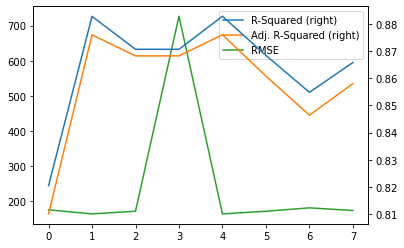

In [34]:
# plot the accuracy measure for all models
# secondary_y: specify the data on the secondary axis
score_card.plot(secondary_y=['R-Squared','Adj. R-Squared'])

# display just the plot
plt.show()